# Tutorial Reproduce Experiments

This is a notebook with instructions ofr how to reproduce experiments in paper:

["Explanation Faithfulness is Alignment: A Unifying and Ge-
ometric Perspective on Interpretability Evaluation"](link)

In [11]:
colab = False

if colab:
    # To access local files, we need to mount Google Drive.
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

# Load supporting functions.
import sys
sys.path.append('../')
from src import *

Mounted at /content/drive


In [12]:
!rm -r plots
!mkdir plots

rm: cannot remove 'plots': No such file or directory


### Download plots

In [20]:
import shutil
from google.colab import files

# Download plots!
folder_path = '/content/plots'
zip_file = '/content/plots.zip'
shutil.make_archive(zip_file.replace('.zip', ''), 'zip', folder_path)
files.download(zip_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Source code

In [24]:
%%capture
# @title configs.py

"""This module contains the configuration for plotting."""

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import zipfile
with zipfile.ZipFile('Roboto_Mono.zip', 'r') as zip_ref:
    zip_ref.extractall(".")

font_dir = ['static/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
plt.rcParams['font.family'] = 'DejaVu Sans Mono'

available_fonts = set(f.name for f in font_manager.fontManager.ttflist)
if 'DejaVu Sans Mono' in available_fonts:
    print("DejaVu Sans Mono font successfully loaded.")
else:
    print("DejaVu Sans Mono font not found. Available fonts:", available_fonts)

# Set font size.
plt.rcParams["font.size"] = 11
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 13

# Disable unicode minus.
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["axes.formatter.use_mathtext"] = True

# Further modernize the plot appearance.
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.5

In [23]:
%%capture
# @title postprocess_scores.py

"""This module contains raw scores post-processing for plotting."""

import pandas as pd
import numpy as np
import pickle
from typing import Optional
import json
import numpy as np
from scipy.spatial.distance import cosine, euclidean
from scipy.stats import pearsonr, spearmanr, kendalltau
import pandas as pd
import numpy as np
import pickle
from typing import Optional
import json
from collections import OrderedDict
import seaborn as sns


with open(f"meta_data_tasks.json", "rb") as f:
    META = json.load(f)

METHOD_NAME_NAIVE = "Fast-GEF"
METHOD_NAME_EXACT = "GEF"

# Post-process fixes.
REPLACE = {
    "Bridge - Naive": METHOD_NAME_NAIVE,
    "Bridge - Exact": METHOD_NAME_EXACT,
    "(imagenet-1k, torchvision.models.resnet18(weights=ResNet18_Weights.DEFAULT))": "(ImageNet, ResNet18)",
    "(imagenet-1k, torchvision.models.resnet18)": "(ImageNet, ResNet18)",
    "torchvision.models.resnet18(weights=ResNet18_Weights.DEFAULT)": "ResNet18",
    "torchvision.models.resnet18": "ResNet18",
    "(sms_spam, mariagrandury/distilbert-base-uncased-finetuned-sms-spam-detection)": "(sms_spam, distilbert-FT)",
    "mariagrandury/distilbert-base-uncased-finetuned-sms-spam-detection": "distilbert-FT",
    "(sms_spam, mrm8488/bert-tiny-finetuned-sms-spam-detection)": "(sms_spam, BERT tiny-FT)",
    "mrm8488/bert-tiny-finetuned-sms-spam-detection": "BERT tiny-FT",
    "(sst2, VityaVitalich/bert-tiny-sst2)": "(SST2, BERT tiny-FT)",
    "VityaVitalich/bert-tiny-sst2": "BERT tiny-FT",
    "(imdb, AlignmentResearch/robust_llm_pythia-imdb-14m-mz-ada-v3)": "(IMDb, Pythia-14M)",
    "AlignmentResearch/robust_llm_pythia-imdb-14m-mz-ada-v3": "Pythia-14M",
    "imagenet-1k": "ImageNet",
    "imdb": "IMDb",
    "fasion_mnist": "fMNIST",
    "mnist": "MNIST",
    "lenet": "LeNet",
    "compas": "COMPAS",
    "derma": "Derma",
    "blood": "Blood",
    "path": "Path",
    "cnn": "MedCNN",
    "avila": "Avila",
    "mlp": "2-layer MLP",
    "ann": "3-layer MLP",
    "(fashion_mnist, lenet)": "(fMNIST, LeNet)",
    "(mnist, lenet)": "(MNIST, LeNet)",
    "(compas, lr)": "(COMPAS, LR)",
    "(adult, lr)": "(Adult, LR)",
    "(compas, ann)": "(COMPAS, 3-layer MLP)",
    "(adult, ann)": "(Adult, 3-layer MLP)",
    "(blood, cnn)": "(Blood, MedCNN)",
    "(avila, mlp)": "(Avila, 2-layer MLP)",
    "(derma, cnn)": "(Derma, MedCNN)",
    "(path, cnn)": "(Path, MedCNN)",
    "IntegratedGradients": "INTG",
    "GuidedBackprop": "GBP",
    "Guided-Backprop": "GBP",
    "GradientShap": "SHAP-G",
    "MACO": "MACO-50",
    "Fourier": "FO-50",
    "Act-Max": "DV-50",
    "MACO-100": "MACO-100",
    "Fourier-100": "FO-100",
    "Act-Max-100": "DV-100",
    "MACO-250": "MACO-250",
    "Fourier-250": "FO-250",
    "Act-Max-250": "DV-250",
    "LRP-Eps": "LRP-ε",
    "LRP-Z+": "LRP-z+",
    "Saliency": "SAL",
    "Gradient": "GRAD",
    "Auto-Interpret": "LLM-x",
    "IntegratedGradients": "INTG",
    "LayerIntegratedGradients": "L-INTG",
    "Random Guess": "RAN",
    "Random Guess K": "RAN-K",
    "Saliency": "SAL",
    "LayerGradCam": "G-CAM",
    "SmoothGrad": "SMG",
    "PartitionShap": "SHAP-P",
    "GradientShap": "SHAP-G",
    "PartitionShap-10": "SHAP-P-10",
    "PartitionShap-5": "SHAP-P-5",
    "InputXGradient": "IXG",
    'Auto-Interpret-5': 'LLM-x-5',
    'Auto-Interpret-10': 'LLM-x-10',
    'LayerIntegratedGradients-5': 'L-INTG-5',
    'LayerIntegratedGradients-10': 'L-INTG-10',
    "PartitionShap-1": "SHAP-P-5",
    "PartitionShap-1": "SHAP-P-10",
    'Random Guess K=5': 'RAN-5',
    'Random Guess K=10': 'RAN-10',
    'Random Guess K=5-5': 'RAN-5',
    'Random Guess K=10-10': 'RAN-10',
}

GLOBAL_METHODS = ['DV-50', "DV-100", "DV-250", 'FO-50', "FO-100", "FO-250", 'MACO-50', "MACO-100", 'MACO-250']
LOCAL_METHODS = ['GRAD', 'SAL', 'SHAP-G', 'GBP', 'IXG', 'INTG',  'SMG', 'LRP-z+', 'LRP-ε']  # "SHAP-P", "L-INTG",
TEXT_METHODS = ['LLM-x-5', 'LLM-x-10', "L-INTG-5", "L-INTG-10", "SHAP-P-5", "SHAP-P-10", "RAN-10", "RAN-5", ]
RANDOM_METHODS = ['RAN', 'RAN-5', 'RAN-10']

cmap_tab = "Greys"
cmap_vis = "Greys"
cmap_tex = "Greys"

global_colors = dict(zip(GLOBAL_METHODS, (sns.color_palette("Greens", len(GLOBAL_METHODS)).as_hex()))) # BuGn
local_colors = dict(zip(LOCAL_METHODS, sns.color_palette("Purples", len(LOCAL_METHODS)).as_hex())) # Purples
colors = {**global_colors, **local_colors}
for r in RANDOM_METHODS:
    colors[r] = 'gray'
colors = OrderedDict((key, colors[key]) for key in colors)
colors = {**colors, **{'LLM-x-5': "#e1b9fc", 'LLM-x-10': "#9c69cb", "L-INTG-5": "#476f95", "L-INTG-10": "#194a7a", "SHAP-P-5": "#6a8e8f", "SHAP-P-10": "#1c4e4f"}}

# Define colors.
colors_text = {
    'LLM-x-5': "#f3b76d", # f8e860
    'LLM-x-10': "#e69d5e", # e4c22a
    "RAN-5": "gray",
    "RAN-10": "gray",
    'L-INTG-5': "#97d4cd", # 7c95d9
    'L-INTG-10': "#67ae9a", # 5c79c6
    'SHAP-P-5': "#6e9b90", # 3d5eb3
    'SHAP-P-10': "#4b6962", #1f419f

}

def recalculate_similarity_scores_row(row=None, model_distortions=None, explanation_distortions=None, similarity_func=spearmanr, keep_only_first_model=False, remove_first_model=False):
    """
    Calculate similarity scores between distortions using the specified similarity function for a single row.

    Parameters:
        - row (pandas.Series): A single row from a DataFrame containing model and explanation distortions.
        - similarity_func (function): Function to calculate similarity between two vectors (default is cosine).

    Returns:
        - float: Mean similarity score across all perturbations for the given row.
    """
    if row is not None:
        distortion_f = np.array(row['model_distortions'])
        distortion_e = np.array(row['explanation_distortions'])
    else:
        distortion_f = np.array(model_distortions)
        distortion_e = np.array(explanation_distortions)

    M, N, batch_size = distortion_f.shape
    scores = np.zeros((M, batch_size)) * np.nan

    for m_ix in range(M):
        if keep_only_first_model and m_ix > 0:
            continue
        elif remove_first_model and m_ix == 0:
            continue
        for s_ix in range(batch_size):
            if not np.isnan(distortion_e[m_ix, :, s_ix]).any():
                sim_score = similarity_func(
                    distortion_f[m_ix, :, s_ix],
                    distortion_e[m_ix, :, s_ix]
                )[0]
                scores[m_ix, s_ix] = sim_score
    if remove_first_model:
        # Remove first dim of scores.
        scores = scores[1:, :]
    if keep_only_first_model:
        # Keep only first dim of scores.
        scores = scores[:1, :]

    bridge_scores = np.nanmean(scores, axis=0)
    return bridge_scores

def convert_dict_to_df(filename, method_suffix_name: Optional[str] = None,
                       method_suffix: Optional[str] = None,
                       keep_only_first_model: bool = False,
                       remove_first_model: bool = False,
                       verbose: bool = False):
    with open(filename, "rb") as f:
        scores_dict = pickle.load(f)

    # Initialize dictionaries to store the results.
    results = {
        "Task": [],
        "Dataset": [],
        "Model": [],
        "mean_score": [],
        "std_score": [],
        "std_error_score": [],
        "time": [],
        "model_size": [],
        "explanation_size": [],
        "mean_e_dist": [],
        "std_e_dist": [],
        "std_error_e_dist": [],
        "mean_f_dist": [],
        "std_f_dist": [],
        "std_error_f_dist": [],
        "bridge_scores": [],
        "model_distortions": [],
        "explanation_distortions": [],
        "perturbation_path": [],
        "accuracy": [],
        "sample_size": [],
        "rank": [],
    }
    indices = []

    # Loop through the scores_dict to extract and compute the necessary metrics
    for setting_name, data in scores_dict.items():
        for metric_name, score_data in data.items():
            mean_scores = []
            for xai_method, metrics in score_data.items():

                if (method_suffix and xai_method == method_suffix_name) or (method_suffix and method_suffix_name is None):
                    xai_method += method_suffix

                distortion_f = np.array(metrics["distortion_f"])
                distortion_e = np.array(metrics["distortion_e"])

                # Recalculate scores using calculate_similarity_scores_row.

                try:
                    scores = recalculate_similarity_scores_row(model_distortions=distortion_f, explanation_distortions=distortion_e, keep_only_first_model=keep_only_first_model, remove_first_model=remove_first_model)
                except:
                    print("fFailed to recalculate_similarity_scores_row for {setting_name} {metric_name} {xai_method}")
                    scores = np.array(metrics["scores"])

                time = metrics["time"]
                sample_size = metrics["nr_samples"]

                if verbose:
                    print(f"Processing {setting_name}, {metric_name}, {xai_method}, nr scores: {len(scores)}")
                mean_score = np.nanmean(scores)
                std_score = np.nanstd(scores)
                perturbation_path = metrics["perturbation_path"]
                accuracy = metrics.get("accuracy", None)

                mean_distortion_f = np.nanmean(distortion_f)
                std_distortion_f = np.nanstd(distortion_f)
                mean_distortion_e = np.nanmean(distortion_e)
                std_distortion_e = np.nanstd(distortion_e)

                std_error_score = np.nanstd(scores)/ np.sqrt(sample_size)
                std_error_distortion_e = np.nanstd(distortion_e)/ np.sqrt(sample_size)
                std_error_distortion_f = np.nanstd(distortion_f)/ np.sqrt(sample_size)

                # Append the computed metrics to the results
                mean_scores.append(mean_score)

                results["mean_score"].append(mean_score)
                results["std_score"].append(std_score)
                results["std_error_score"].append(std_error_score)
                results["mean_f_dist"].append(mean_distortion_f)
                results["std_f_dist"].append(std_distortion_f)
                results["std_error_f_dist"].append(std_error_distortion_e)
                results["mean_e_dist"].append(mean_distortion_e)
                results["std_e_dist"].append(std_distortion_e)
                results["std_error_e_dist"].append(std_error_distortion_f)
                results["time"].append(time)
                results["perturbation_path"].append(perturbation_path)
                results["accuracy"].append(accuracy)
                results["sample_size"].append(sample_size)

                results["bridge_scores"].append(scores.tolist())
                results["model_distortions"].append(distortion_f.tolist())
                results["explanation_distortions"].append(distortion_e.tolist())

                results["Task"].append(META[setting_name]['task'])
                results["model_size"].append(META[setting_name]['model_size'])
                results["explanation_size"].append(META[setting_name]['explanation_size'])
                results['Dataset'].append(setting_name.split(", ")[0].replace("(", ""))
                results['Model'].append(setting_name.split(", ")[1].replace(")", ""))

                # Append the corresponding index
                indices.append((REPLACE.get(setting_name, setting_name), REPLACE.get(metric_name, metric_name), REPLACE.get(xai_method, xai_method)))

            # Compute the rank for the mean scores (higher is better)
            ranks = pd.Series(mean_scores).rank(ascending=False)
            for rank in ranks:
                results["rank"].append(rank)

    # Create a MultiIndex DataFrame.
    indices = pd.MultiIndex.from_tuples(indices, names=["Setting", "Metric", "XAI Method"])
    df = pd.DataFrame(results, index=indices)
    df.reset_index(inplace=True)

    df['Scope'] = df['XAI Method'].apply(lambda x: 'Global' if x in GLOBAL_METHODS else 'Local')
    #df["XAI Method"] = df[["XAI Method"]].applymap(lambda x: REPLACE_TEXT.get(x, x))

    df.loc[df['XAI Method'] == 'RAN', 'Scope'] = 'RAN'

    return df

def convert_layer_dict_to_df(filename, method_suffix_name: Optional[str] = None, method_suffix: Optional[str] = None,):

    with open(filename, "rb") as f:
        scores_dict = pickle.load(f)

    # Initialize dictionaries to store the results.
    results = {
        "Task": [],
        "Dataset": [],
        "Model": [],
        "layers": [],
        "model_distortions_by_layer": [],
        "explanation_distortions_by_layer": [],
        "model_distortions": [],
        "explanation_distortions": [],
        "time": [],
        "model_size": [],
        "explanation_size": [],
        "model_distortions": [],
        "explanation_distortions": [],
        "sample_size": [],
    }
    indices = []

    # Loop through the scores_dict to extract and compute the necessary metrics
    for setting_name, data in scores_dict.items():
        for metric_name, score_data in data.items():
            mean_scores = []
            for xai_method, metrics in score_data.items():

                if (method_suffix and xai_method == method_suffix_name) or (method_suffix and method_suffix_name is None):
                    xai_method += method_suffix

                layers = list(metrics["model_distortions_by_layer"].keys())
                model_distortions_by_layer = metrics["model_distortions_by_layer"]
                explanation_distortions_by_layer = metrics["explanation_distortions_by_layer"]
                model_distortions_values = list(metrics["model_distortions_by_layer"].values())
                explanation_distortions_values = list(metrics["explanation_distortions_by_layer"].values())

                # Recalculate scores using calculate_similarity_scores_row.
                time = metrics["time"]
                sample_size = metrics["nr_samples"]

                results["layers"].append(layers)
                results["model_distortions_by_layer"].append(model_distortions_by_layer)
                results["explanation_distortions_by_layer"].append(explanation_distortions_by_layer)
                results["model_distortions"].append(model_distortions_values)
                results["explanation_distortions"].append(explanation_distortions_values)
                results["time"].append(time)
                results["sample_size"].append(sample_size)

                results["Task"].append(META[setting_name]['task'])
                results["model_size"].append(META[setting_name]['model_size'])
                results["explanation_size"].append(META[setting_name]['explanation_size'])
                results['Dataset'].append(setting_name.split(", ")[0].replace("(", ""))
                results['Model'].append(setting_name.split(", ")[1].replace(")", ""))

                # Append the corresponding index
                indices.append((REPLACE.get(setting_name, setting_name), REPLACE.get(metric_name, metric_name), REPLACE.get(xai_method, xai_method)))

    # Create a MultiIndex DataFrame
    indices = pd.MultiIndex.from_tuples(indices, names=["Setting", "Metric", "XAI Method"])
    df = pd.DataFrame(results, index=indices)
    df.reset_index(inplace=True)

    df['Metric'] = df['Metric'].str.replace("Bottom", "Bottom-up")
    df['Metric'] = df['Metric'].str.replace("Top", "Top-down")


    df['Scope'] = df['XAI Method'].apply(lambda x: 'Global' if x in GLOBAL_METHODS else 'Local')
    # If XAI Method = RAN, set Scope to RAN
    df.loc[df['XAI Method'] == 'RAN', 'Scope'] = 'RAN'

    return df


In [37]:
%%capture
# @title plotting.py (general)

"""This module contains plotting code."""

import random
import numpy as np
from collections import OrderedDict
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


def plot_agreement_cm(df,
            cmap: str = "Greens",
            dtype: str ="tab",
            order: bool = True):

    df.sort_values(by='XAI Method', ascending=order, inplace=True)

    # Create a pivot table for the confusion matrix.
    pivot_df = df.pivot(index='XAI Method', columns='Metric', values=['mean_score', 'rank'])

    # Combine mean_score and rank into a single cell for annotation.
    pivot_df_combined = pivot_df.apply(
        lambda row: [f'{row["mean_score"][col]:.2f}\n(R{int(row["rank"][col])})' for col in row["mean_score"].index],
        axis=1, result_type='expand'
    )
    pivot_df_combined.columns = pivot_df['mean_score'].columns

    # Plot the heatmap with only the mean_score values.
    plt.figure(figsize=(3, 2.5))
    heatmap = sns.heatmap(pivot_df['mean_score'].T, annot=False, cmap=cmap, linewidths=.5, linecolor='black', cbar=True, vmin=0, vmax=1)
    for i in range(pivot_df_combined.shape[0]):
        for j in range(pivot_df_combined.shape[1]):
            c = 'black'
            # If value is over 0.75, make colour white.
            if float(pivot_df_combined.iloc[i, j].split("\n")[0]) >= 0.75:
                c = 'white'
            heatmap.text(i+0.5, j+0.5, pivot_df_combined.iloc[i, j],
                        ha='center', va='center', color=c)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.savefig(f'plots/ranking_agreement_heatmap_{dtype}.svg')
    plt.show()

def plot_agreement(df, dtype: str = "tab", ncols: int = 3, colors: dict = {}, order: bool = True):

    df.sort_values(by='XAI Method', ascending=order, inplace=True)
    plt.figure(figsize=(3, 3))
    DIFF = 0.25

    # Plot lines for each XAI method.
    for method in df['XAI Method'].unique():
        method_data = df[df['XAI Method'] == method]
        plt.plot(method_data['Metric'],
                 method_data['mean_score'],
                 marker='o', linestyle="-",
                 linewidth=6,
                 path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()],
                 alpha=0.9,
                 label=method,
                 color=colors[method])

        for x, y, rank in zip(method_data['Metric'], method_data['mean_score'], method_data['rank']):
            plt.text(x, y+0.05, f'(R{int(rank)})', color=colors[method], ha='center', va='bottom')

    #plt.xlabel('Metric')
    plt.ylabel('GEF Score')
    plt.ylim(df['mean_score'].min()-DIFF, df['mean_score'].max()+DIFF)
    plt.xlim(-0.25, 1.25)
    plt.title(df.Setting[0].replace("(", "").replace(", ", " ("))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncols=ncols) # title='Methods',
    plt.grid(True)
    plt.savefig(f'plots/agreement_{dtype}.svg')
    plt.show()

def plot_faithfulness_curve_patches(confidences, patch_sizes, colour_map, linestyles, dataset, img_size: int = 28, title: Optional[str] = None, distortion: bool = True):
    total_pixels = img_size*img_size
    x_values = np.arange(1, total_pixels + 1) / total_pixels * 100

    start_confidence = confidences[0][0]

    for i, patch_size in enumerate(patch_sizes):
        if distortion:
            confidences[i] = np.abs(np.subtract(confidences[i], start_confidence))
        plt.plot(x_values, confidences[i], color=colour_map[patch_size], label=f"{patch_size}x{patch_size} patch",  linestyle=linestyles[dataset], lw=1.5)

    end_confidence = 0
    if distortion:
        end_confidence = -start_confidence
        start_confidence = 0
    linear_confidences = np.linspace(start_confidence, end_confidence, total_pixels)
    plt.plot(x_values, np.abs(linear_confidences), linestyle=linestyles[dataset], c="slategrey", alpha=0.5, label="Expectation")

    plt.xlabel('Cumulative Perturbation (%)')
    if distortion:
        plt.ylabel('Model Distortion')
    else:
        plt.ylabel('Model Response')
    if title:
        plt.title(title)
    if dataset == "MNIST":
        plt.legend(title="Input Parameter", loc='center left', bbox_to_anchor=(1, 0.5)) #plt.legend()
    #plt.title("MNIST, fMNIST (LeNet)")
    plt.title("Model Faithfulness (Ass. 3)")

def plot_faithfulness_curve_baselines(confidences, modifications, colour_map, linestyles, dataset,  img_size: int = 28, title: Optional[str] = None, distortion: bool = False, ADD_DATASET_LABEL: bool=False):
    total_pixels = img_size*img_size
    x_values = np.arange(1, total_pixels + 1) / total_pixels * 100

    start_confidence = confidences[0][0][0]

    for m, modification in enumerate(modifications):
        sample_confidences = confidences[m][0]
        if distortion:
            sample_confidences = np.abs(np.subtract(sample_confidences, start_confidence))
        plt.plot(x_values, sample_confidences, color=colour_map[modification], lw=1.5, linestyle=linestyles[dataset], label=modification.title())

    end_confidence = 0
    if distortion:
        end_confidence = -start_confidence
        start_confidence = 0
    linear_confidences = np.linspace(start_confidence, end_confidence, total_pixels)
    plt.plot(x_values, np.abs(linear_confidences), linestyle=linestyles[dataset], c="slategrey", alpha=0.5, label="Expectation")

    plt.xlabel('Cumulative Perturbation (%)')
    if distortion:
        plt.ylabel('Model Distortion')
    else:
        plt.ylabel('Model Response')
    if title:
        plt.title(title)
    if dataset == "MNIST":
        plt.legend(title="Input Parameter", loc='center left', bbox_to_anchor=(1, 0.5)) #plt.legend()

    datasets = ["MNIST", "fMNIST"]
    plt.title("Model Faithfulness (Ass. 3)")
    #plt.legend([f"MNIST, fMNIST (LeNet)"], loc='upper left')
    plt.grid(True)

    if ADD_DATASET_LABEL:

        handles = [plt.Rectangle((0, 0), 1, 1, facecolor="white", hatch="." if key == "fMNIST" else "", edgecolor="black") for key in datasets]
        labels = datasets
        plt.legend(handles, labels, title="Datasets", loc='center left', bbox_to_anchor=(1, 0.5))

def plot_alignment(df_robustness, noise_types, noise_levels):

    colours_discovery = {
        "(COMPAS, 3-layer MLP)": "#81D46D",
        "(Avila, 2-layer MLP)": "#D8AD3A",
        "(ImageNet, ResNet18)": "#70A1CE",
        "(Path, MedCNN)": "lightcoral",
        "(MNIST, LeNet)": "sandybrown"
    }
    for noise_type in noise_types:
        noise_type_str = noise_type.split("Bridge - ")[1].replace(" -", " ")
        df_plot = df_robustness[df_robustness["Metric"].str.contains(noise_type)]

        M = 5
        Z = 10
        nr_samples = df_plot.sample_size.iloc[0]
        PLOT_CONTOUR = True

        # Go over all the settings.
        settings_disc = df_plot.Setting.unique()
        perturbation_levels = np.arange(0, Z)

        for s in settings_disc:

            colour = colours_discovery[s]
            df_robustness_setting = df_plot.loc[df_plot.Setting == s]

            xai_methods = df_robustness_setting["XAI Method"].unique()

            for ix, xai in enumerate(xai_methods):
                df_robustness_setting_xai = df_robustness_setting.loc[df_robustness_setting["XAI Method"] == xai]
                model_distortions = np.array(df_robustness_setting.model_distortions.iloc[ix]).mean(axis=0)
                explanation_distortions = np.array(df_robustness_setting.explanation_distortions.iloc[ix]).mean(axis=0)

                fig, ax = plt.subplots(figsize=(3, 3))

                for i in range(Z):
                    if i in noise_levels:
                        colour = f'#{random.randint(0, 0xFFFFFF):06X}' # Get a random hex colour.

                        if PLOT_CONTOUR:
                            xi =  model_distortions[i]
                            yi = explanation_distortions[i]
                            X, Y = np.meshgrid(np.linspace(xi.min(), xi.max(), 100), np.linspace(yi.min(), yi.max(), 100))
                            Z_values = np.sqrt((X - xi.mean())**2 + (Y - yi.mean())**2)
                            xy = np.vstack([model_distortions[i], explanation_distortions[i]])
                            kde = gaussian_kde(xy, bw_method=0.5)

                            X, Y = np.meshgrid(np.linspace(model_distortions[i].min(), model_distortions[i].max(), 100),
                                            np.linspace(explanation_distortions[i].min(), explanation_distortions[i].max(), 100))
                            positions = np.vstack([X.ravel(), Y.ravel()])
                            Z_values = np.reshape(kde(positions).T, X.shape)
                            cmap = ListedColormap([colour])
                            cp = ax.contour(X, Y, Z_values, cmap=cmap, levels=4, alpha=0.6)

                        plt.scatter(x=model_distortions[i], y=explanation_distortions[i], c=colour, alpha=0.5, edgecolor="black", label=f"Z={i}")

                plt.legend(loc='upper right')
                plt.xlim(model_distortions.min() * 0.8, model_distortions.max())# * 1.1)
                plt.ylim(explanation_distortions.min() * 0.9, explanation_distortions.max() * 1.1)
                plt.xlabel("Model Distortion")
                plt.ylabel(f"{xai} Distortion")
                plt.title(s.replace("(", "").replace(", ", " ("))
                plt.grid(True)
                plt.savefig(f'plots/alignment_{xai}_{s.lower().replace("(", "").replace(", ", "_").replace(")", "")}.svg')
                plt.show()


def plot_robustness(df_robustness, noise_types=["Bridge - Input - Additive - Class"]):
    # Hyperparameters.
    colours_discovery = {"(COMPAS, 3-layer MLP)": "#81D46D", "(Avila, 2-layer MLP)": "#D8AD3A", "(ImageNet, ResNet18)": "#70A1CE", "(Path, MedCNN)": "lightcoral", "(MNIST, LeNet)": "sandybrown"}

    for noise_type in noise_types:

        noise_type_str = noise_type.split("Bridge - ")[1].replace(" -", " ")
        df_plot = df_robustness[df_robustness["Metric"].str.contains(noise_type)]

        M = 5
        Z = 10
        nr_samples = df_plot.sample_size.iloc[0]
        PLOT_VIOLIN = True
        PLOT_SCATTER = False
        PLOT_OUTLIERS = False
        PLOT_JITTER = True

        # Go over all the settings.
        settings_disc = df_plot.Setting.unique()
        perturbation_levels = np.arange(0, Z)

        for s in settings_disc:
            colour = colours_discovery[s]
            df_robustness_setting = df_plot.loc[df_plot.Setting == s]
            xai_methods = len(df_robustness_setting)
            model_distortions = np.array([np.array(df_robustness.model_distortions.iloc[i]).mean(axis=0) for i in range(xai_methods)]).transpose(1, 2, 0).reshape(Z, nr_samples*xai_methods)

            fig, ax = plt.subplots(figsize=(4, 3))

            if PLOT_SCATTER:
                for Df in model_distortions:
                    plt.scatter(x=perturbation_levels, y=Df, alpha=0.25, c=colour)

            if PLOT_VIOLIN:
                data = []
                for i in range(Z):
                    data.append(model_distortions[:, i*nr_samples*M:(i+1)*nr_samples*M].flatten())

                df_points = pd.DataFrame({
                    'Perturbation': np.repeat(np.arange(Z), nr_samples * xai_methods),
                    #'Perturbation': np.repeat(np.arange(Z), nr_samples * M * xai_methods),
                    'Model distortion': np.concatenate(data)
                })

                # Create violin plots for each perturbation level
                sns.violinplot(x='Perturbation',
                            y='Model distortion',
                            data=df_points,
                        #    inner="point",
                            palette=[colour]*Z, ax=ax)

                if PLOT_JITTER:
                    # Overlay scatter points with jitter
                    jitter = 0.025  # Amount of jitter to apply

                    # Calculate the 1.5*IQR for each Perturbation level to determine outliers
                    for i, level in enumerate(df_points['Perturbation'].unique()):
                        subset = df_points[df_points['Perturbation'] == level]
                        q1 = subset['Model distortion'].quantile(0.05)
                        q3 = subset['Model distortion'].quantile(0.95)
                        iqr = q3 - q1
                        lower_bound = q1 - 1.5 * iqr
                        upper_bound = q3 + 1.5 * iqr

                        # Identify outliers
                        outliers = subset[(subset['Model distortion'] < lower_bound) | (subset['Model distortion'] > upper_bound)]

                        # Plot all points
                        ax.scatter(np.random.normal(i, jitter, size=len(subset)), subset['Model distortion'],
                                color=colour, alpha=0.5, edgecolor='black', s=30)

                        if PLOT_OUTLIERS:
                            # Highlight outliers with a different color and larger size
                            ax.scatter(np.random.normal(i, jitter, size=len(outliers)), outliers['Model distortion'],
                                    color='red', edgecolor='black', s=50, label='Outliers' if i == 0 else "")

            print(model_distortions.shape)
            plt.errorbar(x=perturbation_levels,
                        y=model_distortions.mean(axis=1),
                        #y=model_distortions.mean(axis=0),
                        yerr=model_distortions.std(axis=1),
                        #yerr=model_distortions.std(axis=0),
                        lw=1, color='blue', marker='o', linestyle='dashed', label="Mean")

            noise_levels = np.array([df_robustness_setting.perturbation_path.iloc[i] for i in range(xai_methods)]).mean(axis=0)
            plt.title("Model Robustness (Ass. 1)") # +f"\n{noise_type_str}"
            plt.ylabel("Model Distortion") #$\mathbf{D}_f$ "+f'{s}') # .replace("(", "").replace(", ", " ("))
            setting_label = s.replace("(", "").replace(", ", " (")
            ax.legend([f"{setting_label}".replace(' (', '\n(')], loc='upper left')
            plt.xlabel("Additive Noise Level ($Z$)")
            plt.grid(True)
            ax.set_xticks(np.arange(Z))
            ax.set_xticklabels(["Acc. Orig"]+np.repeat("", Z-2).tolist()+["Acc. = 1/C"])
            plt.savefig(f'plots/model_robustness_analysis_{s.lower().replace("(", "").replace(", ", "_").replace(")", "")}.svg')
            plt.show()

def plot_sensitivity(df_sensitivity):
    # Hyperparameters.

    colours_discovery_dark = {"(COMPAS, 3-layer MLP)": "darkgreen", "(Avila, 2-layer MLP)": "darkgoldenrod", "(ImageNet, ResNet18)": "darkblue", "(Path, MedCNN)": "darkred", "(MNIST, LeNet)": "darkorange"}
    settings_disc = df_sensitivity.Setting.unique()

    for s in settings_disc:

        fig, ax = plt.subplots(figsize=(4, 3))

        df_layers = df_sensitivity.loc[df_sensitivity.Setting == s]
        layers = df_layers.layers.iloc[0]

        ran_orders = ["Top", "Bottom"]

        def concat_lists(series):
            return np.concatenate(series.tolist(), axis=1)

        df_layers_ran = df_layers.groupby('Metric').apply(
            lambda x: pd.Series({
                'model_distortions': concat_lists(x['model_distortions']),
                'layers': x['layers'].iloc[0],
            })
        ).reset_index()

        for i in range(len(df_layers_ran)):
            dist = df_layers_ran.model_distortions.iloc[i]
            order = df_layers_ran.Metric.iloc[i].split(" - ")[-1]

            if order == "Top":
                # Reverse the x values.
                x_vals = np.arange(len(layers))[::-1]
                colour = colours_discovery[s]
            else:
                # Regular x values.
                x_vals = np.arange(len(layers))
                colour = colours_discovery_dark[s]

            plt.errorbar(x_vals, np.array(dist).mean(axis=1), yerr=np.array(dist).std(axis=1), label=order, c=colour, lw=1.5, ls='dotted' if order == "Independent" else "-")
            plt.title("Model Sensitivity (Ass. 2)")

            # Determine x-ticks and labels based on the number of layers.
            layers_str = [l.replace("model.network.", "layer.") for l in layers]
            if len(layers) > 20:
                xticks_indices = np.arange(0, len(layers), 3)  # Only every 3rd tick
            else:
                xticks_indices = np.arange(len(layers))  # All ticks

            xticks_labels = [layers_str[i].replace("layer", "l").replace("downsample", "ds") for i in xticks_indices]  # Labels for the selected ticks

            ax.set_xticks(xticks_indices)
            ax.set_xticklabels(xticks_labels[::-1] if order == "Bottom" else xticks_labels, rotation="vertical", fontsize=8 if "ResNet" in s else 10)

        plt.legend(title="Order")
        plt.grid(True)
        plt.ylabel("Model Distortion")
        plt.xlabel("Layer-by-Layer Randomisation")
        plt.savefig(f'plots/model_sensitivity_analysis_{s.lower().replace("(", "").replace(", ", "_").replace(")", "")}.svg')
        plt.show()


def plot_Z_influence(discovery_df, noise_types, Z):
    colours_discovery = {
        "(COMPAS, 3-layer MLP)": "#81D46D",
        "(Avila, 2-layer MLP)": "#D8AD3A",
        "(ImageNet, ResNet18)": "#70A1CE",
        "(Path, MedCNN)": "lightcoral",
        "(MNIST, LeNet)": "sandybrown"
    }

    for noise_type in noise_types:
        settings = discovery_df.Setting.unique()
        fig, ax = plt.subplots(figsize=(4, 3))

        for s in settings:
            noise_type_str = noise_type.split("Bridge - ")[1].replace(" -", " ")
            df_plot = discovery_df[discovery_df["Metric"].str.contains(noise_type)]
            discovery_df_setting = df_plot.loc[df_plot.Setting == s]

            M = 5
            nr_samples = discovery_df_setting.sample_size.iloc[0]
            perturbation_levels = np.arange(0, Z)
            colour = colours_discovery[s]

            xai_methods = len(discovery_df_setting)
            model_distortions = np.array([np.array(discovery_df_setting.model_distortions.iloc[i]).mean(axis=0) for i in range(xai_methods)]).transpose(1, 2, 0).reshape(Z, nr_samples * xai_methods)

            max_y_value = model_distortions.max()

            model_distortions_normalised = model_distortions / max_y_value

            ax.errorbar(x=perturbation_levels,
                        y=model_distortions_normalised.mean(axis=1),
                        yerr=model_distortions_normalised.std(axis=1),
                        lw=1, marker='o', linestyle='dashed', label=s, color=colour)

        plt.title(f'Influence of Z={Z}')
        ax.set_xlabel(f'Pertubation levels')#{noise_type_str.replace("Class", "Noise")}')
        ax.set_ylabel("Model Distortion\n(normalised)")
        ax.set_xticks(np.arange(Z))
        ax.set_xticklabels(["Acc. Orig"] + np.repeat("", Z-2).tolist() + ["Acc. = 1/C"])
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncols=1)
        plt.grid(True)
        plt.savefig(f'plots/influence_Z={Z}_all_settings.svg')
        plt.show()


def prepare_vision_tabular_results(file_names, file_names_100s, file_names_250s):

    # Process.
    results_dfs = [convert_dict_to_df(f, method_suffix=None) for f in file_names]
    results_dfs_100s = [convert_dict_to_df(f, method_suffix="-100") for f in file_names_100s]
    results_dfs_250s = [convert_dict_to_df(f, method_suffix="-250") for f in file_names_250s]

    # Get master df.
    results_df = pd.concat(results_dfs+results_dfs_100s+results_dfs_250s)
    results_df.reset_index(inplace=True)

    # Recompute rank and sort.
    del results_df["rank"]
    results_df['rank'] = results_df.groupby(['Setting', "Metric"])['mean_score'].rank(ascending=False)
    results_df.sort_values(by=["Setting", "Scope"], inplace=True)
    results_df.head(10)
    return results_df


def plot_bar_vision_tabular(results_df):


    # Assuming results_df is defined and contains the necessary data
    BOTH_VARIANTS = True

    settings = ['(Avila, 2-layer MLP)',
                '(Adult, 3-layer MLP)',
                '(Adult, LR)',
                '(COMPAS, 3-layer MLP)',
                '(COMPAS, LR)',
                #'(ImageNet, ResNet18)',
                #'(Derma, MedCNN)',
                #'(Path, CNN)',
                #'(MNIST, LeNet)',
                #'(fMNIST, LeNet)',
                ]

    settings_separated = {"tabular": ['(Avila, 2-layer MLP)',
                '(Adult, 3-layer MLP)',
                '(Adult, LR)',
                '(COMPAS, 3-layer MLP)',
                '(COMPAS, LR)',],
                        "vision": ['(ImageNet, ResNet18)',
                '(Derma, MedCNN)',
                '(Path, MedCNN)',
                '(MNIST, LeNet)',
                '(fMNIST, LeNet)',]
                        }


    #settings = results_df['Setting'].unique()

    hatches = {
        'DV-100': "/",
        #'DV-50': "/",
        'DV-250': "/",
        'MACO-100': "*",
        #'MACO-50': "*",
        'MACO-250': "*",
        'FO-100': "+",
        'FO-50': "+",
        'FO-250': "+",
        # 'LRP-eps': "x",
        # 'GBP': "o",
        # 'GRAD': "+",
    }
    STD_TYPE = "std_error_score" # std_score // std_error_score

    for k, settings in settings_separated.items():

        # Determine the total number of XAI Methods across all settings
        fig, ax = plt.subplots(figsize=(11, 2))
        bar_width = 0.2
        opacity = 0.75
        all_xai_methods = results_df["XAI Method"].unique()
        gap = 0.25  # len(all_xai_methods) * bar_width//2
        base_x = 0
        full_x = []
        for i, setting in enumerate(settings):
            setting_data_filter = results_df[results_df['Setting'] == setting]

            if BOTH_VARIANTS:
                if not setting_data_filter.index.empty:
                    if setting_data_filter.Task.iloc[0] == "tabular":
                        setting_data_filter = setting_data_filter.loc[(results_df['Metric'] ==  METHOD_NAME_EXACT)]
                    else:
                        setting_data_filter = setting_data_filter.loc[(results_df['Metric'] == METHOD_NAME_NAIVE)]
            else:
                setting_data_filter = setting_data_filter.loc[(results_df['Metric'] == METHOD_NAME_NAIVE)]

            setting_data_filter = setting_data_filter.sort_values(by=["Scope", "XAI Method"])  # , inplace=True)
            xai_methods = setting_data_filter["XAI Method"].unique()
            x = np.arange(len(xai_methods)) * bar_width + base_x + (i * bar_width)
            methods = [c for c in colors if c in xai_methods]
            for ix, xai in enumerate(methods):
                mean_score = setting_data_filter.loc[setting_data_filter['XAI Method'] == xai, "mean_score"]
                std_score = setting_data_filter.loc[setting_data_filter['XAI Method'] == xai, STD_TYPE]
                plt.bar(x[ix], mean_score,
                    bar_width,
                    edgecolor="black",
                    yerr=std_score, # if xai != "RAN" else 0,
                    alpha=opacity,
                    color=colors[xai],
                    #hatch=hatches.get(xai, None),
                    label=f'{xai}' if i == 0 else "")
            base_x += gap + len(xai_methods) * bar_width
            full_x += [x]

        if STD_TYPE == "std_score":
            plt.ylim(-0.25, 1.0)
        else:
            plt.ylim(-0.05, 1.0)

        # Customising the plot.
        plt.ylabel('GEF Score')
        if k == "vision":
            plt.ylabel('Fast-GEF Score')
        #plt.ylim(-0.25, 1.1)
        handles = [plt.Rectangle((0, 0), 1, 1, facecolor=colors[key],
                                alpha=opacity, edgecolor="black") for key in colors if key != "Model"] #  if key in xai_methods
        labels = [key for key in colors if key not in TEXT_METHODS and key != "Model"]
        plt.title("Cross-Domain Benchmarking of Global and Local Methods")
        plt.legend(handles, labels,
                title="Global and Local Methods",
                ncol=7, loc='lower center', bbox_to_anchor=(0.5, 1.15))
        x_tick_positions = [np.mean(x) for x in full_x]
        plt.xticks(x_tick_positions,
                labels=[s.replace("(", "").replace(", ", "\n(") for s in settings]),
                    # rotation=45,
                    #  ha='right') ###### \n and center
        plt.grid(True)
        plt.savefig(f"plots/bridge_bar_{k}_{STD_TYPE}.svg", format="svg")
        plt.show()


def prepare_vision_toy_exact_results(file_1="scores_consolidated_27082024_bench_toy_exact_local.pkl",
                                     file_2="scores_consolidated_28082024_bench_derm_exact_local.pkl"):

    # Get exact df.
    results_df_exact = pd.concat([convert_dict_to_df(file_1),convert_dict_to_df(file_2),])
    results_df_exact.reset_index(inplace=True)

    # Recompute rank and sort.
    del results_df_exact["rank"]
    results_df_exact['rank'] = results_df_exact.groupby(['Setting', "Metric"])['mean_score'].rank(ascending=False)
    results_df_exact.sort_values(by=["Setting", "Scope"], inplace=True)
    results_df_exact.head(10)

    return results_df_exact



def prepare_table(results_df_table, std_type: str = "std_error_score"):
    results_df_table = results_df_table.groupby(["Dataset", "Model", "XAI Method"])[["mean_score", std_type]].mean() # "Task", .......
    table = results_df_table.apply(lambda row: f'{row["mean_score"]:.2f} $\pm$ {row[std_type]:.2f}', axis=1).unstack().T
    table.fillna('-', inplace=True)
    table = table.reset_index()
    table['Scope'] = table['XAI Method'].apply(lambda x: 'Global' if x in GLOBAL_METHODS else 'Local')
    table = table.sort_values(by=['Scope', "XAI Method"], ascending=False)
    table = table.set_index('Scope').reset_index().set_index(['Scope', 'XAI Method'])
    table.columns = table.columns.set_levels([
        #table.columns.levels[0].str.capitalize().map(lambda x: rf'\url{{{x}}}'),  # task (unchanged)
        table.columns.levels[0].str.capitalize().map(lambda x: rf'\texttt{{{x}}}'),  # dataset
        table.columns.levels[1].str.upper().map(lambda x: rf'\texttt{{{x}}}')   # model
    ])
    table.index = table.index.set_levels([
        table.index.levels[0].str.capitalize().map(lambda x: rf'\texttt{{{x}}}'),  # scope
        table.index.levels[1].str.upper().map(lambda x: rf'\texttt{{{x}}}'),  # xai method
    ])
    return table



def postprocess_meta_evaluation():
    category_order = ['Unified', 'Faithfulness', 'Sensitivity', 'Robustness']
    abbreviations = {
        'Pixel-Flipping': 'PF',
        'Faithfulness Correlation': 'FC',
        'Faithfulness Estimate': 'FE',
        'Region Perturbation': 'RP',
        'MPRT': 'MPRT',
        'sMPRT': 'sMPRT',
        'eMPRT': 'eMPRT',
        'Relative Output Stability': 'ROS',
        'Relative Representation Stability': 'RRS',
        'Relative Input Stability': 'RIS',
        'Bridge - Exact': METHOD_NAME_EXACT,
        'Bridge - Naive': METHOD_NAME_NAIVE
    }
    colours = {'Unified': '#154c79',
    'Faithfulness': '#829c9e',
    'Sensitivity': '#92ba92',
    'Robustness': '#666b5e',
    }


    def process_df(df, dataset_name: str, xai_group: str):
        #if "Faithfulness" in df.Category:
        #df.loc[df.Category == "Faithfulness", "Category"] = "Fidelity"
        df['Category'] = pd.Categorical(df['Category'], categories=category_order, ordered=True)
        df['Estimator'] = df['Estimator'].map(abbreviations)
        df = df.sort_values(['Category', 'Estimator'])
        df["Dataset"] = dataset_name
        df["XAI-Group"] = xai_group
        return df

    estimators={k: list(v.keys()) for k, v in benchmark_m1.items()}
    df_m1 = process_df(make_benchmarking_df(benchmark=benchmark_m1, estimators=estimators_faith), dataset_name="MNIST", xai_group="GS_SA")
    df_m2 = process_df(make_benchmarking_df(benchmark=benchmark_m2, estimators=estimators_faith), dataset_name="MNIST", xai_group="G_GC")
    df_f1 = process_df(make_benchmarking_df(benchmark=benchmark_f1, estimators=estimators_faith), dataset_name="fMNIST", xai_group="GS_SA")
    df_f2 = process_df(make_benchmarking_df(benchmark=benchmark_f2, estimators=estimators_faith), dataset_name="fMNIST", xai_group="G_GC")
    df_im1 = process_df(make_benchmarking_df(benchmark=benchmark_im1, estimators=estimators_not_exact), dataset_name="ImageNet", xai_group="G_GC_GS_SA")
    df = pd.concat([df_m1, df_m2, df_f1, df_f2, df_im1])
    return df

def plot_meta_evaluation_bar(df, col_group: str = "Category", figsize = (11, 3)):
    hatch_patterns = {'MNIST': '/', 'fMNIST': '', 'ImageNet': '*'}
    hatch_patterns = {'Category': '/', 'Estimator': ''}
    plt.figure(figsize=figsize)

    if col_group == "Estimator":
        df['Estimator'] = pd.Categorical(df['Estimator'], categories=[METHOD_NAME_EXACT, METHOD_NAME_NAIVE, "PF", "FC", "RP", "MPRT", "sMPRT", "eMPRT", "RIS", "ROS", "RRS"], ordered=True)

    for group_name, df_group in df.groupby([col_group]):

        label_name = group_name
        if "Fast" in group_name[0]:
            label_name = f"Fast\nGEF"

        bar = plt.bar(group_name,
                df_group['MC'].mean(),
                color=colours[df_group['Category'].unique()[0]],
                label=label_name,
                yerr=df_group['MC std'].mean(),
                capsize=5,
                alpha=0.6,
                edgecolor="black")

        plt.text(bar[0].get_x() + bar[0].get_width() / 2,
                bar[0].get_height()+df_group['MC std'].mean()+0.025,
                f'{df_group["MC"].mean():.3f}',
                ha='center',
                fontsize=11,
                va='bottom')

    plt.ylabel(f'Mean MC (MPT, IPT)')
    plt.ylim([0., 1.0])
    if col_group == "Category":
        plt.legend(title=col_group, loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        pass

    plt.grid(True)
    plt.title(f"Meta-Evaluation")
    plt.savefig(f"plots/meta_eval_{col_group}.svg")
    plt.show()

def plot_meta_evaluation_scatter():
    iters = 3
    K = 5
    sample_size = 250*iters*K
    FACTOR = 2000
    sample_size = 250
    col_group = "Category"
    tests = ["Model", "Input"]
    marker_styles = {"ImageNet": 'o', "fMNIST": 's', "MNIST": '^'} #, 'D', 'v']
    datasets = marker_styles.keys()
    fig, ax = plt.subplots(figsize=(3, 3))
    for group_name, df_group in df.groupby([col_group]):
        for dataset in datasets:

            ipt = df_group.loc[((df_group.Test == "Input") & (df_group.Dataset == dataset)), "MC"].mean()
            mpt = df_group.loc[((df_group.Test == "Model") & (df_group.Dataset == dataset)), "MC"].mean()
            c = colours[df_group['Category'].unique()[0]]
            s = (df_group.loc[df_group.Test == "Model", "MC std"].mean()/np.sqrt(sample_size))*FACTOR*20
            ax.scatter(ipt, mpt, color=c, label=dataset, s=s, alpha=0.6, marker=marker_styles[dataset], edgecolor="black")
            #s=(df_group.loc[df_group.Test == "Model", "MC std"].mean()*2)*FACTOR,
            ax.set_ylim(0.5, 1.0)
            ax.set_xlim(0.5, 1.0)

    plt.xlabel('MC (IPT)')
    plt.ylabel('Meta-Consistency (MPT)')
    plt.title(f"By Dataset")
    #plt.xlabel('Input Perturbation Test')
    #plt.ylabel('Model Perturbation Test')
    legend_handles = [mlines.Line2D([], [], color='white', markeredgecolor="black", marker=marker_styles[ds], linestyle='None', markersize=10, label=ds) for ds in datasets]
    plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5), ncols=1, title="Dataset")
    plt.grid(True)
    plt.savefig(f"plots/meta_eval_scatter.svg")
    plt.show()



def plot_kde(df, methods, palette, colors_text, y, corr_method, suffix, mode):
    # Function to plot KDE.

    fig, ax = plt.subplots(figsize=(3, 3))
    #fig, ax = plt.subplots(figsize=(5, 3))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    sns.kdeplot(
        data=df[df['XAI Method'].isin(methods)],
        x=y,
        hue='XAI Method',
        hue_order=methods,
        fill=True,
        palette=palette,
        common_norm=False,
        alpha=0.5,
        bw_adjust=1.5,
        edgecolor='black',
        ax=ax,
    )

    handles = [plt.Rectangle((0, 0), 1, 1, facecolor=colors_text[key], edgecolor="black") for key in colors_text]
    labels = methods
    ax.legend(handles, labels, title="Methods", loc='center left',  bbox_to_anchor=(1, 0.5))

    plt.title(f"Top-{suffix} Tokens")
    if mode == "naive":
        plt.xlabel(f'Fast-GEF Score')
    else:
        plt.xlabel(f'GEF Score')
    plt.grid(True)
    plt.savefig(f"plots/benchmarking_text_kde_{suffix}_{mode}.svg", facecolor=fig.get_facecolor())
    plt.show()

def prepare_text_results_naive(files_5_tokens=['llmx_5_sst2_naive.pkl',
                                                  'llmx_5_sms_naive.pkl',
                                                  'llmx_text_control_top_5_naive.pkl'],
                                  files_10_tokens=['llmx_10_sst2_naive.pkl',
                                                   'llmx_10_sms_naive.pkl',
                                                   'llmx_text_control_top_10_naive.pkl'],
                                  files_control=['llmx_text_control_top_5_10_naive.pkl']):

    # Process files.
    results_dfs_5s = [convert_dict_to_df(f, method_suffix="-5") for f in files_5_tokens]
    results_dfs_10s = [convert_dict_to_df(f, method_suffix="-10") for f in files_10_tokens]
    results_dfs_ran = [convert_dict_to_df(f) for f in files_control]

    # Get master df.
    results_text_df = pd.concat(results_dfs_5s+results_dfs_10s+results_dfs_ran)
    results_text_df.reset_index(inplace=True)

    # Explode the DataFrame to flatten the lists in 'bridge_scores'.
    results_text_df["bridge_scores_spearmanr"] = results_text_df.apply(
        lambda row: recalculate_similarity_scores_row(row, similarity_func=spearmanr), axis=1)
    results_text_df_ex = results_text_df.explode('bridge_scores_spearmanr')
    results_text_df_ex['bridge_scores_spearmanr_all'] = results_text_df_ex['bridge_scores_spearmanr'].astype(float)
    results_text_df_ex.index = np.arange(len(results_text_df_ex))
    results_text_df_ex.sort_values(by="XAI Method", inplace=True)

    return results_text_df_ex

def plot_text_results_naive(results_text_df_ex):

    # Define colors.
    colors_text = {
        'LLM-x-5': "#f3b76d", # f8e860
        'LLM-x-10': "#e69d5e", # e4c22a
        "RAN-5": "gray",
        "RAN-10": "gray",
        'L-INTG-5': "#97d4cd", # 7c95d9
        'L-INTG-10': "#67ae9a", # 5c79c6
        'SHAP-P-5': "#6e9b90", # 3d5eb3
        'SHAP-P-10': "#4b6962", #1f419f

    }

    # Create palette and order list.
    palette = list(colors_text.values())
    palettes = [item for item in palette for _ in range(2)]
    palettes = palette + palette
    dataset = "both"
    order = [ 'LLM-x-5', 'LLM-x-10', 'RAN-5', 'RAN-10','L-INTG-5', 'L-INTG-10', 'SHAP-P-5', 'SHAP-P-10']

    # Plot for each Dataset in results_text_df_ex.
    dfs = {"sst2": results_text_df_ex.loc[results_text_df_ex.Dataset == "sst2"],
        "sms_spam": results_text_df_ex.loc[results_text_df_ex.Dataset == "sms_spam"]}

    for y in ["bridge_scores_spearmanr_all"]:
        corr_method = y.split("_")[2].capitalize()
        fig, ax = plt.subplots(figsize=(5, 3))
        box = sns.boxplot(data=results_text_df_ex, x='XAI Method', hue="Dataset", y=y, order=order, ax=ax, showfliers=False)

        # Apply hatching to dataset 2.
        num_boxes = len(results_text_df_ex['XAI Method'].unique())
        for i, patch in enumerate(box.patches):
            if i == len(colors_text)*len(dfs):
                break
            patch.set_facecolor(palettes[i])

        # Remove xlabel.
        ax.set_xlabel('')
        ax.set_ylabel(f'Fast-GEF Score')
        plt.grid(True)

        plt.xticks(fontsize=11, rotation=20)
        handles = [plt.Rectangle((0, 0), 1, 1, facecolor="white", hatch="/" if key == "sms_spam" else "", edgecolor="black") for key in dfs] #methods
        labels = dfs.keys()
        ax.legend(handles, labels, title="Datasets", loc='center left', bbox_to_anchor=(1, 0.5))

        plt.title(f"LLM-x vs Random vs Local")
        plt.savefig(f"plots/benchmarking_text_boxplots_{dataset}_naive.svg")
        plt.show()


    plot_kde(results_text_df_ex, order, palette, colors_text, y, corr_method, 'K', "naive")

    plot_kde(
        results_text_df_ex,
        ['LLM-x-5', 'RAN-5', 'L-INTG-5', 'SHAP-P-5'],
        [colors_text['LLM-x-5'], colors_text['RAN-5'], colors_text['L-INTG-5'], colors_text['SHAP-P-5']],
        colors_text,
        y,
        corr_method,
        '5',
        "naive"
    )

    plot_kde(
        results_text_df_ex,
        ['LLM-x-10', 'RAN-10', 'L-INTG-10', 'SHAP-P-10'],
        [colors_text['LLM-x-10'], colors_text['RAN-10'], colors_text['L-INTG-10'], colors_text['SHAP-P-10']],
        colors_text,
        y,
        corr_method,
        '10',
        "naive"
    )

def prepare_text_results_exact(files_5_tokens=['llmx_exact_sms_5.pkl',
                                            'llmx_exact_sms_control_5.pkl',
                                            'llmx_exact_sst2_control_5.pkl',
                                            'llmx_exact_sst2_5.pkl',
                                               'llmx_exact_sst2_pshap_5.pkl',
                                               'llmx_exact_sms_pshap_5.pkl'],
                                  files_10_tokens=['llmx_exact_sms_control_10.pkl',
                                                'llmx_exact_sst2_10.pkl',
                                                'llmx_exact_sms_10.pkl',
                                                'llmx_exact_sst2_control_10.pkl',
                                                   'llmx_exact_sst2_pshap_10.pkl',
                                               'llmx_exact_sms_pshap_10.pkl']):

    # Process files.
    if files_5_tokens:
        results_dfs_5s = [convert_dict_to_df(f, method_suffix="-5") for f in files_5_tokens]
    else:
        results_dfs_5s = []
    if files_10_tokens:
        results_dfs_10s = [convert_dict_to_df(f, method_suffix="-10") for f in files_10_tokens]
    else:
        results_dfs_10s = []

    # Get master df.
    results_text_df = pd.concat(results_dfs_5s+results_dfs_10s)
    results_text_df.reset_index(inplace=True)

    # Explode the DataFrame to flatten the lists in 'bridge_scores'.
    results_text_df["bridge_scores_spearmanr"] = results_text_df.apply(
        lambda row: recalculate_similarity_scores_row(row, similarity_func=spearmanr), axis=1)
    results_text_df_ex = results_text_df.explode('bridge_scores_spearmanr')
    results_text_df_ex['bridge_scores_spearmanr_all'] = results_text_df_ex['bridge_scores_spearmanr'].astype(float)
    results_text_df_ex.index = np.arange(len(results_text_df_ex))
    results_text_df_ex.sort_values(by="XAI Method", inplace=True)

    return results_text_df_ex

def plot_text_results_exact(results_text_df_ex):

    # Define colors.
    colors_text = {
        'LLM-x-5': "#f3b76d", # f8e860
        'LLM-x-10': "#e69d5e", # e4c22a
        "RAN-5": "gray",
        "RAN-10": "gray",
        'L-INTG-5': "#97d4cd", # 7c95d9
        'L-INTG-10': "#67ae9a", # 5c79c6
        'SHAP-P-5': "#6e9b90", # 3d5eb3
        #'SHAP-P-10': "#4b6962", #1f419f

    }

    # Create palette and order list.
    palette = list(colors_text.values())
    palettes = [item for item in palette for _ in range(2)]
    palettes = palette + palette
    dataset = "both"
    order = ['LLM-x-5', 'LLM-x-10', 'RAN-5', 'RAN-10', 'L-INTG-5', 'L-INTG-10', 'SHAP-P-5']#, , 'SHAP-P-10']

    # Plot for each Dataset in results_text_df_ex.
    dfs = {"sst2": results_text_df_ex.loc[results_text_df_ex.Dataset == "sst2"],
           "sms_spam": results_text_df_ex.loc[results_text_df_ex.Dataset == "sms_spam"]}

    for y in ["bridge_scores_spearmanr_all"]:
        corr_method = y.split("_")[2].capitalize()
        fig, ax = plt.subplots(figsize=(5, 3))
        box = sns.boxplot(data=results_text_df_ex, x='XAI Method', hue="Dataset", y=y, order=order, ax=ax, showfliers=False)

        # Apply hatching to dataset 2.
        num_boxes = len(results_text_df_ex['XAI Method'].unique())
        for i, patch in enumerate(box.patches):
            if i == len(colors_text)*len(dfs):
                break
            patch.set_facecolor(palettes[i])

        # Remove xlabel.
        ax.set_xlabel('')
        ax.set_ylabel(f'GEF Score')
        plt.grid(True)

        plt.xticks(fontsize=11, rotation=20)
        handles = [plt.Rectangle((0, 0), 1, 1, facecolor="white", hatch="/" if key == "sms_spam" else "", edgecolor="black") for key in dfs] #methods
        labels = dfs.keys()
        ax.legend(handles, labels, title="Datasets", loc='center left', bbox_to_anchor=(1, 0.5))

        plt.title(f"LLM-x vs Random vs Local")
        plt.savefig(f"plots/benchmarking_text_boxplots_{dataset}_exact.svg")
        plt.show()


    plot_kde(results_text_df_ex, order, palette, colors_text, y, corr_method, 'K', "exact")

    plot_kde(
        results_text_df_ex,
        ['LLM-x-5', 'RAN-5', 'L-INTG-5', 'SHAP-P-5'], # ,
        [colors_text['LLM-x-5'], colors_text['RAN-5'], colors_text['L-INTG-5']], # ,
        colors_text,
        y,
        corr_method,
        '5',
        "exact"
    )

    plot_kde(
        results_text_df_ex,
        ['LLM-x-10', 'RAN-10', 'L-INTG-10'], # , 'SHAP-P-10'
        [colors_text['LLM-x-10'], colors_text['RAN-10'], colors_text['L-INTG-10']], # , colors_text['SHAP-P-10']
        colors_text,
        y,
        corr_method,
        '10',
        "exact"
    )

def plot_percentage_improvement_to_random(results_text_df_ex, colors_text):
    ran_avg = results_text_df_ex[results_text_df_ex['XAI Method'].isin(['RAN-5', 'RAN-10'])]['bridge_scores_spearmanr_all'].mean()
    results_text_df_ex['Percentage Improvement'] = ((results_text_df_ex['bridge_scores_spearmanr_all'] / ran_avg) - 1) * 100
    results_text_df_ex['Base XAI Method'] = results_text_df_ex['XAI Method'].str.replace(r'-(5|10)', '', regex=True)
    grouped_mean = results_text_df_ex.groupby(['Base XAI Method'])['Percentage Improvement'].mean()
    grouped_std = results_text_df_ex.groupby(['Base XAI Method'])['Percentage Improvement'].std() / np.sqrt(250)

    base_colors_text = {
        'LLM-x': "#f3b76d",
        'L-INTG': "#97d4cd",
        'SHAP-P': "#6e9b90",
        'RAN': "gray"
    }

    fig, ax = plt.subplots(figsize=(3, 3))

    for method in ["LLM-x", "L-INTG", "SHAP-P"]:
        mean_value = grouped_mean.loc[method]
        std_value = grouped_std.loc[method]
        ax.barh(method, mean_value,
                xerr=std_value,
                color=base_colors_text.get(method, "gray"),
                edgecolor='black')

    ax.set_xlabel('Relative Improvement (%)')
    ax.set_title('Relative GEF to Random')
    ax.grid(True, axis='x')
    plt.tight_layout()
    plt.savefig(f"plots/benchmarking_text_percentage_improvement.svg")
    plt.show()

# Plot distribution!

def plot_global_local_distribution(results_df):

    # Explode the DataFrame to flatten the lists in 'bridge_scores'
    exploded_df = results_df.explode('bridge_scores')
    exploded_df['bridge_scores'] = exploded_df['bridge_scores'].astype(float)
    colors_loc_glob = {
        'Global': sns.color_palette("BuGn", 1).as_hex()[0],
        'Local': sns.color_palette("Purples", 1).as_hex()[0],
        'RAN': 'gray'
    }
    exploded_df = exploded_df.loc[(exploded_df.Task == "vision") & (exploded_df.Metric == METHOD_NAME_NAIVE)]
    fig, ax = plt.subplots(figsize=(4, 3))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    sns.kdeplot(
        data=exploded_df[exploded_df['Scope'] == 'Global'],
        x='bridge_scores',
        fill=True,
        color=colors_loc_glob['Global'],
        alpha=0.75,
        bw_adjust=0.5,
        common_norm=False,
        edgecolor='black',
        label='Global',
    )
    sns.kdeplot(
        data=exploded_df[exploded_df['Scope'] == 'Local'],
        x='bridge_scores',
        fill=True,
        color=colors_loc_glob['Local'],
        alpha=0.75,
        bw_adjust=0.5,
        common_norm=False,
        edgecolor='black',
        label='Local',
    )

    ax.set_xlabel('GEF Score')
    ax.set_ylabel('Density')
    plt.legend(title="Scope", loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.title("Global vs Local Methods")
    plt.savefig(f"plots/distribution_local_vs_global.svg")
    plt.show()

def plot_both_distortions(results_df, setting):

    results_df_setting = results_df.loc[results_df["Setting"] == setting]

    # Compute model distortions.
    dist_fs = []
    for i, method in enumerate(results_df_setting["XAI Method"].unique()):
        dist_f = np.array(results_df_setting.model_distortions.iloc[i])

        dist_fs.append(dist_f)
    dist_f = np.array(dist_fs).mean(axis=0)

    fig = plt.figure(figsize=(4, 3))

    for i, method in enumerate(results_df_setting["XAI Method"].unique()):

        # Compute explanation distortions.

        if "-100" in method:
            continue
        if "-50" in method:
            continue
        dist_e = np.array(results_df_setting.explanation_distortions.iloc[i])

        yerr = np.arange(1, 6)
        plt.plot(dist_f.mean(axis=(0, 2)), dist_e.mean(axis=(0, 2)), c=colors[method])
        plt.scatter(dist_f.mean(axis=(0, 2)), dist_e.mean(axis=(0, 2)), label=method, s=yerr**3, edgecolor="black",c=colors[method])

    plt.legend(ncols=5, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(setting.replace("(", "").replace(", ", " ("))
    plt.xlabel("Model Distortion")
    plt.ylabel("Explanation Distortion")
    plt.grid(True)
    plt.savefig(f'plots/vision_expl_distortions_{setting.lower().replace("(", "").replace(", ", "_").replace(")", "")}.svg')
    plt.show()

def compute_improvement_by_dataset(df_text):
    ran_avg = df_text[df_text['XAI Method'].isin(['RAN-5', 'RAN-10'])]['bridge_scores_spearmanr_all'].mean()
    df_text['Percentage Improvement'] = ((df_text['bridge_scores_spearmanr_all'] / ran_avg) - 1) * 100
    df_text['Base XAI Method'] = df_text['XAI Method'].str.replace(r'-(5|10)', '', regex=True)

    datasets = df_text.Dataset.unique()
    methods = ["LLM-x", "L-INTG", "SHAP-P"]

    for dataset in datasets:
        print(f"Dataset: {dataset}")
        for method in methods:
            data = df_text[(df_text['Dataset'] == dataset) &
                                      (df_text['Base XAI Method'] == method)]
            mean_value = data['Percentage Improvement'].mean()
            std_value = data['Percentage Improvement'].std() / np.sqrt(len(data))
            print(f"{method}: {mean_value:.2f} ± {std_value:.2f}")
        print()

In [16]:
%%capture
# @title plotting_utils.py (faithfulness)

from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST, FashionMNIST
from torch.utils.data import DataLoader

class LeNet(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2, bias=True)
        self.max_pool_1 = torch.nn.MaxPool2d(kernel_size=2)
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0, bias=True)
        self.max_pool_2 = torch.nn.MaxPool2d(kernel_size=2)
        self.fc1 = torch.nn.Linear(16 * 5 * 5, 120)
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = self.max_pool_1(x)
        x = torch.nn.functional.relu(self.conv2(x))
        x = self.max_pool_2(x)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def load_mnist_samples(n=10):
    transform = transforms.Compose([transforms.ToTensor()])
    test_set = MNIST(root='./data', train=False, download=True, transform=transform)
    test_loader = DataLoader(test_set, batch_size=n, shuffle=True)
    return next(iter(test_loader))

def load_fmnist_samples(n=10):
    transform = transforms.Compose([transforms.ToTensor()])
    test_set = FashionMNIST(root='./data', train=False, download=True, transform=transform)
    test_loader = DataLoader(test_set, batch_size=n, shuffle=True)
    return next(iter(test_loader))

def modify_and_predict(model, images, labels, img_size=28, modification="black"):
    num_pixels = img_size*img_size
    confidences = np.zeros((images.shape[0], num_pixels))
    pixel_indices = torch.randperm(num_pixels)
    modified_images = images.clone()
    mean = images.mean()

    for i in range(num_pixels):
        pixel_index = pixel_indices[i]
        flat_images = modified_images.view(images.shape[0], -1)

        if modification == 'black':
            flat_images[:, pixel_index] = 0
        elif modification == 'white':
            flat_images[:, pixel_index] = 1
        elif modification == 'random':
            flat_images[:, pixel_index] = torch.rand(images.shape[0])
        elif modification == 'mean':
            flat_images[:, pixel_index] = mean
        modified_images = flat_images.view_as(images)
        outputs = model(modified_images)

        confidences[:, i] = outputs.gather(1, labels.view(-1, 1)).squeeze().detach().cpu().numpy()

    return confidences

def modify_and_predict_with_patches(model, image, label, patch_size, img_size=28, nr_channels=2, modification="black"):
    assert modification == "black"
    num_pixels = img_size * img_size
    confidences = np.zeros(num_pixels)
    modified_image = image.clone()
    patches_per_row = img_size // patch_size
    total_patches = patches_per_row ** nr_channels
    patch_indices = [(i, j) for i in range(0, img_size, patch_size) for j in range(0, img_size, patch_size)]
    np.random.shuffle(patch_indices)
    patch_count = 0
    pixel_count = 0

    for (x, y) in patch_indices:
        modified_image[0, 0, x:x+patch_size, y:y+patch_size] = 0
        patch_count += 1
        pixel_count += patch_size**2
        with torch.no_grad():
            outputs = model(modified_image)
            confidence = outputs.gather(1, label.view(-1, 1)).squeeze().item()
            confidences[pixel_count - patch_size**2:pixel_count] = confidence
            if pixel_count >= num_pixels:
                break

    return confidences


## Experiment — Vision and Tabular

To reproduce these results, run the following.

For tabular:
```bash
torchrun --nproc_per_node=5 run_comparison.py --fname=bench_tab_exact_all_prev1e4 --datasets=avila,compas,adult,compas,adult --models=mlp,lr,lr,ann,ann --xai_methods=RA,SA,IXG,SG,GS,IG,GB,G,LRPz,LRPeps --full_size=250 --M=5 --Z=5 --T=10 --K=10 --only_exact=True
```

For vision:
```bash
torchrun --nproc_per_node=5 run_comparison.py --fname=bench_toy_exact_local --datasets=fashion_mnist,mnist,derma,path,imagenet-1k --full_size=250 --xai_methods=MACO,FO,AMRA,SA,IXG,SG,GS,IG,GB,G,LRPz,LRPeps --full_size=250 --M=5 --Z=5 --T=10 --K=10 -am_steps=50
```

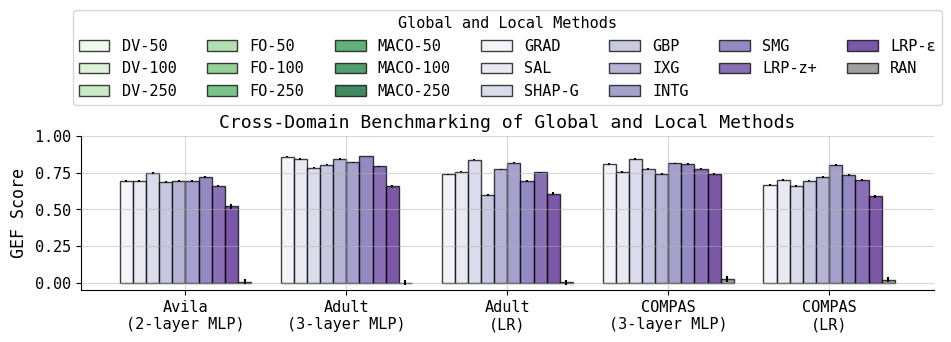

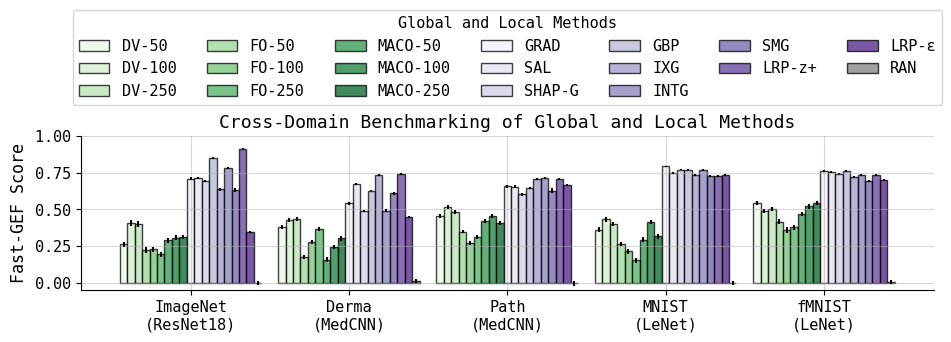

In [29]:
# Load data.
results_df = prepare_vision_tabular_results()

# Plot!
plot_bar_vision_tabular(results_df)

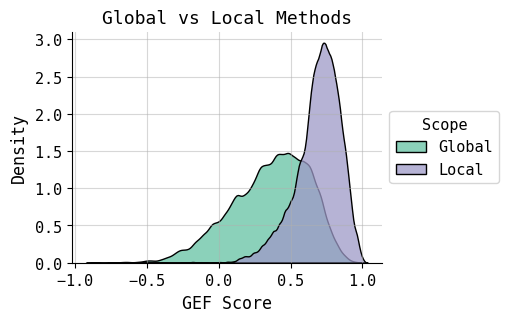

In [ ]:
# Plot!
plot_global_local_distribution(results_df)

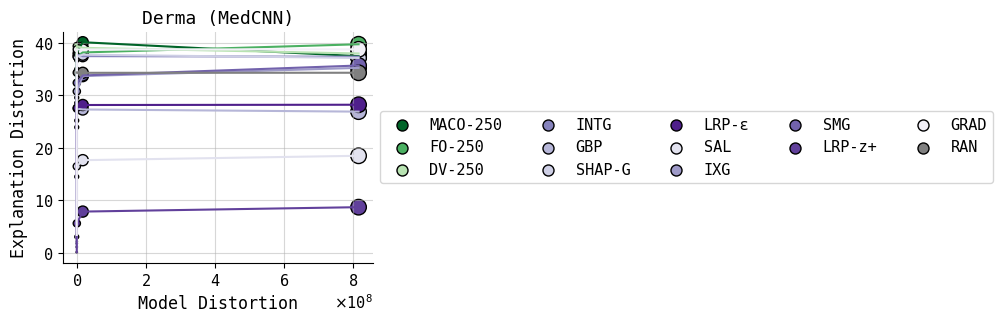

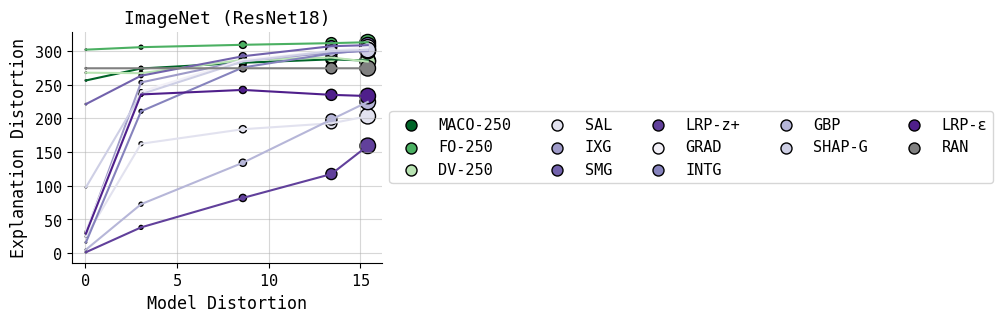

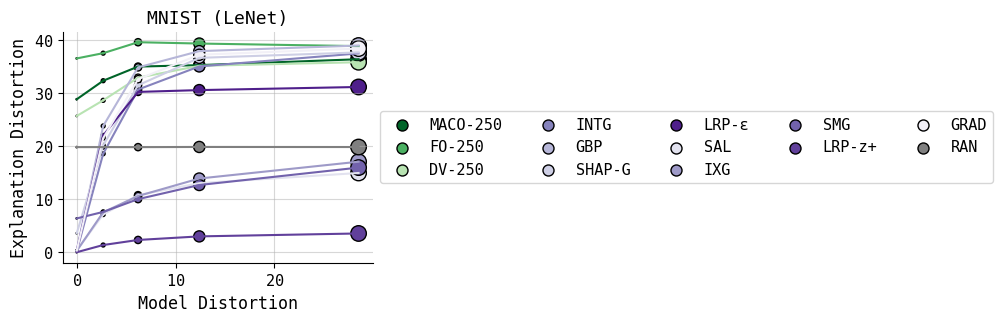

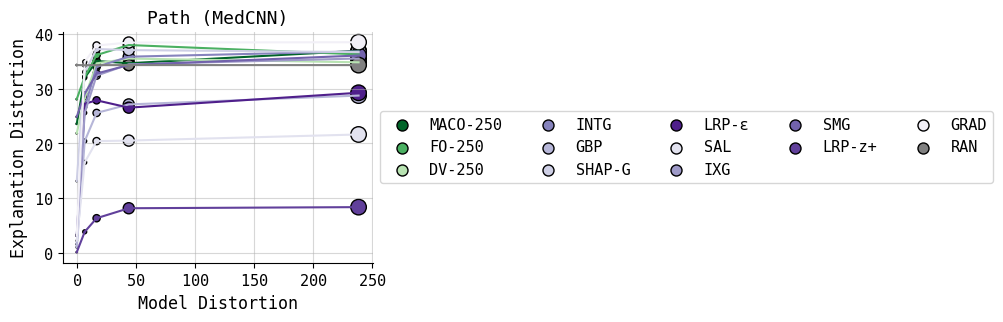

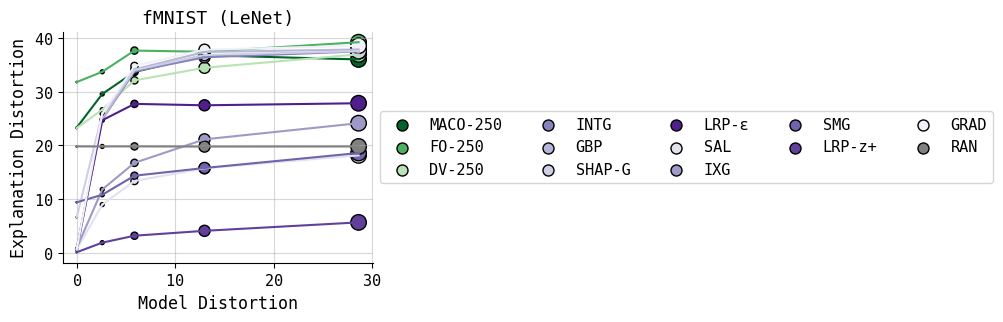

In [ ]:
results_df_vision = results_df.loc[(results_df.Task == "vision") & (results_df.Metric == METHOD_NAME_NAIVE)]
for s in results_df_vision['Setting'].unique():
    plot_both_distortions(results_df_vision, s)

In [ ]:
# Prepare tabular table in paper.
results_df_tab = results_df.loc[(results_df.Task == "tabular") & (results_df.Metric == METHOD_NAME_EXACT)]
table_tab = prepare_table(results_df_tab)
table_tab.to_latex(escape=False, multicolumn_format="c", label="cross-bench-tab-exact")

'\\begin{table}\n\\label{cross-bench-tab-exact}\n\\begin{tabular}{lllllll}\n\\toprule\n & Dataset & \\multicolumn{2}{c}{\\texttt{Adult}} & \\texttt{Avila} & \\multicolumn{2}{c}{\\texttt{Compas}} \\\\\n & Model & \\texttt{ANN} & \\texttt{LR} & \\texttt{MLP} & \\texttt{ANN} & \\texttt{LR} \\\\\nScope & XAI Method &  &  &  &  &  \\\\\n\\midrule\n\\multirow[t]{10}{*}{\\texttt{Local}} & \\texttt{SMG} & 0.86 $\\pm$ 0.00 & 0.69 $\\pm$ 0.00 & 0.72 $\\pm$ 0.01 & 0.81 $\\pm$ 0.01 & 0.73 $\\pm$ 0.01 \\\\\n & \\texttt{SHAP-G} & 0.78 $\\pm$ 0.00 & 0.84 $\\pm$ 0.01 & 0.75 $\\pm$ 0.01 & 0.84 $\\pm$ 0.00 & 0.66 $\\pm$ 0.01 \\\\\n & \\texttt{SAL} & 0.84 $\\pm$ 0.00 & 0.76 $\\pm$ 0.00 & 0.69 $\\pm$ 0.01 & 0.75 $\\pm$ 0.01 & 0.70 $\\pm$ 0.01 \\\\\n & \\texttt{RAN} & -0.00 $\\pm$ 0.02 & 0.00 $\\pm$ 0.02 & 0.00 $\\pm$ 0.02 & 0.02 $\\pm$ 0.02 & 0.02 $\\pm$ 0.02 \\\\\n & \\texttt{LRP-Ε} & 0.66 $\\pm$ 0.01 & 0.61 $\\pm$ 0.01 & 0.52 $\\pm$ 0.01 & 0.74 $\\pm$ 0.01 & 0.59 $\\pm$ 0.01 \\\\\n & \\texttt{LRP-Z+} & 

In [ ]:
# Prepare vision exact table in paper.
results_df_vis_exact = results_df_exact.loc[(results_df_exact.Task == "vision") & (results_df_exact.Metric == METHOD_NAME_EXACT)]
table_vis_exact = prepare_table(results_df_vis_exact)
table_vis_exact.to_latex(escape=False, multicolumn_format="c", label="cross-bench-vis-exact")

'\\begin{table}\n\\label{cross-bench-vis-exact}\n\\begin{tabular}{llllll}\n\\toprule\n & Dataset & \\texttt{Derma} & \\texttt{Fashion_mnist} & \\texttt{Mnist} & \\texttt{Path} \\\\\n & Model & \\texttt{CNN} & \\texttt{LENET} & \\texttt{LENET} & \\texttt{CNN} \\\\\nScope & XAI Method &  &  &  &  \\\\\n\\midrule\n\\multirow[t]{10}{*}{\\texttt{Local}} & \\texttt{SMG} & 0.98 $\\pm$ 0.00 & 0.80 $\\pm$ 0.01 & 0.82 $\\pm$ 0.00 & 0.95 $\\pm$ 0.00 \\\\\n & \\texttt{SHAP-G} & 0.96 $\\pm$ 0.00 & 0.83 $\\pm$ 0.01 & 0.84 $\\pm$ 0.00 & 0.92 $\\pm$ 0.01 \\\\\n & \\texttt{SAL} & 0.96 $\\pm$ 0.00 & 0.80 $\\pm$ 0.00 & 0.83 $\\pm$ 0.01 & 0.89 $\\pm$ 0.01 \\\\\n & \\texttt{RAN} & 0.01 $\\pm$ 0.02 & 0.00 $\\pm$ 0.02 & 0.02 $\\pm$ 0.02 & -0.01 $\\pm$ 0.02 \\\\\n & \\texttt{LRP-Ε} & 0.77 $\\pm$ 0.01 & 0.78 $\\pm$ 0.01 & 0.79 $\\pm$ 0.01 & 0.78 $\\pm$ 0.01 \\\\\n & \\texttt{LRP-Z+} & 0.94 $\\pm$ 0.00 & 0.83 $\\pm$ 0.01 & 0.78 $\\pm$ 0.01 & 0.94 $\\pm$ 0.00 \\\\\n & \\texttt{IXG} & 0.96 $\\pm$ 0.00 & 0.78 $\\p

In [ ]:
# Prepare vision table in paper.
results_df_vis = results_df.loc[(results_df.Task == "vision") & (results_df.Metric == METHOD_NAME_NAIVE)]
table_vis = prepare_table(results_df_vis)
table_vis.to_latex(escape=False, multicolumn_format="c", label="cross-bench-vis-naive")

'\\begin{table}\n\\label{cross-bench-vis-naive}\n\\begin{tabular}{lllllll}\n\\toprule\n & Dataset & \\texttt{Derma} & \\texttt{Fashion_mnist} & \\texttt{Imagenet-1k} & \\texttt{Mnist} & \\texttt{Path} \\\\\n & Model & \\texttt{CNN} & \\texttt{LENET} & \\texttt{TORCHVISION.MODELS.RESNET18} & \\texttt{LENET} & \\texttt{CNN} \\\\\nScope & XAI Method &  &  &  &  &  \\\\\n\\midrule\n\\multirow[t]{10}{*}{\\texttt{Local}} & \\texttt{SMG} & 0.61 $\\pm$ 0.01 & 0.69 $\\pm$ 0.01 & 0.63 $\\pm$ 0.01 & 0.73 $\\pm$ 0.01 & 0.63 $\\pm$ 0.02 \\\\\n & \\texttt{SHAP-G} & 0.49 $\\pm$ 0.01 & 0.74 $\\pm$ 0.01 & 0.69 $\\pm$ 0.01 & 0.77 $\\pm$ 0.01 & 0.60 $\\pm$ 0.01 \\\\\n & \\texttt{SAL} & 0.67 $\\pm$ 0.01 & 0.76 $\\pm$ 0.01 & 0.71 $\\pm$ 0.01 & 0.74 $\\pm$ 0.01 & 0.65 $\\pm$ 0.01 \\\\\n & \\texttt{RAN} & 0.01 $\\pm$ 0.01 & 0.00 $\\pm$ 0.01 & -0.00 $\\pm$ 0.01 & -0.00 $\\pm$ 0.01 & -0.01 $\\pm$ 0.01 \\\\\n & \\texttt{LRP-Ε} & 0.45 $\\pm$ 0.01 & 0.70 $\\pm$ 0.01 & 0.35 $\\pm$ 0.01 & 0.73 $\\pm$ 0.01 & 0.66 $\

## Experiment — Text

To reproduce these results, run the following.
```bash
torchrun --nproc_per_node=4 run_comparison.py --fname=autogemma_5_spam_with_nans --datasets=sms_spam --full_size=250 --batch_size=25 --xai_methods=AI,RAK-5,LIG --top_K=5 --only_exact=True --is_top_K=True --M=5 --Z=5 --K=5 --T=5
```

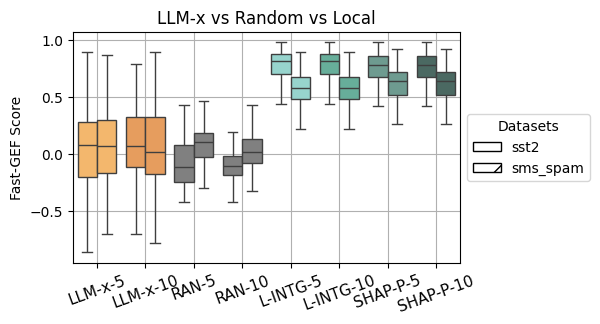

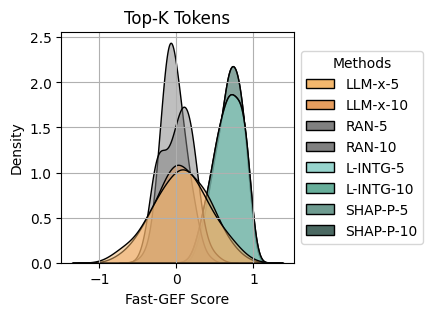

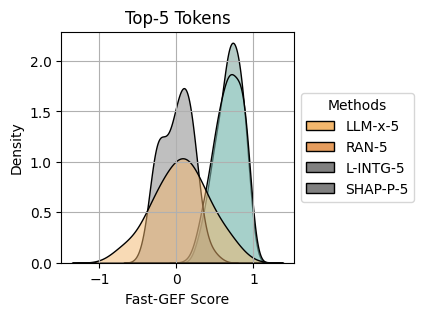

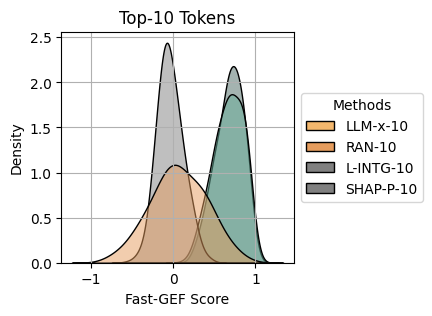

'\\begin{table}\n\\label{cross-bench-tex-naive}\n\\begin{tabular}{llll}\n\\toprule\n & Dataset & \\texttt{Sms_spam} & \\texttt{Sst2} \\\\\n & Model & \\texttt{MRM8488/BERT-TINY-FINETUNED-SMS-SPAM-DETECTION} & \\texttt{VITYAVITALICH/BERT-TINY-SST2} \\\\\nScope & XAI Method &  &  \\\\\n\\midrule\n\\multirow[t]{8}{*}{\\texttt{Local}} & \\texttt{SHAP-P-5} & 0.62 $\\pm$ 0.01 & 0.75 $\\pm$ 0.01 \\\\\n & \\texttt{SHAP-P-10} & 0.62 $\\pm$ 0.01 & 0.75 $\\pm$ 0.01 \\\\\n & \\texttt{RAN-5} & 0.08 $\\pm$ 0.01 & -0.08 $\\pm$ 0.01 \\\\\n & \\texttt{RAN-10} & 0.03 $\\pm$ 0.01 & -0.10 $\\pm$ 0.01 \\\\\n & \\texttt{LLM-X-5} & 0.06 $\\pm$ 0.02 & 0.05 $\\pm$ 0.02 \\\\\n & \\texttt{LLM-X-10} & 0.05 $\\pm$ 0.02 & 0.08 $\\pm$ 0.02 \\\\\n & \\texttt{L-INTG-5} & 0.58 $\\pm$ 0.01 & 0.77 $\\pm$ 0.01 \\\\\n & \\texttt{L-INTG-10} & 0.58 $\\pm$ 0.01 & 0.77 $\\pm$ 0.01 \\\\\n\\cline{1-4}\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'

In [ ]:
# Prepare and plot!
df_text_naive = prepare_text_results_naive()
plot_text_results_naive(df_text_naive)
plot_percentage_improvement_to_random(df_text_naive, colors_text)

# Latex!
table_tex_naive = prepare_table(df_text_naive)
table_tex_naive.to_latex(escape=False, multicolumn_format="c", label="cross-bench-tex-naive")

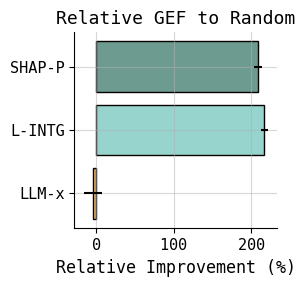

Dataset: sst2
LLM-x: -3.73 ± 7.72
L-INTG: 238.15 ± 2.98
SHAP-P: 230.27 ± 3.75

Dataset: sms_spam
LLM-x: -4.25 ± 8.42
L-INTG: 195.49 ± 2.91
SHAP-P: 185.95 ± 3.06



In [41]:
# Load data.
df_text = prepare_text_results_exact()
df_text = df_text[df_text["XAI Method"] != "RAN-10"]
df_text = df_text[df_text["XAI Method"] != "RAN-5"]
df_ran = prepare_text_results_exact(files_5_tokens=["llmx_exact_sms_ran_5.pkl",
                                                    "llmx_exact_sst2_ran_5.pkl"],
                                    files_10_tokens=["llmx_exact_sms_ran_10.pkl",
                                                     "llmx_exact_sst2_ran_10.pkl"])
df_text = pd.concat([df_text, df_ran])
df_text.index = np.arange(len(df_text))
# Plot!
plot_percentage_improvement_to_random(df_text, colors_text)

# Latex!
compute_improvement_by_dataset(df_text)

## Experiment — Discovering Pitfalls

See robustness, sensitivity, faithfulness and alignment analysis below.

### Robustness - Gaussian Additive Noise

Run robustness and alignment analysis
```bash
torchrun --nproc_per_node=3 run_comparison.py --fname=robustness_and_alignment_analysis --datasets=compas,avila,path,imagenet-1k,mnist --xai_methods=G,GS,SA,AM,RA--run_discovery=True --full_size=50 --batch_size=50 --only_naive=True --Z=10  --am_steps=50
```

fFailed to recalculate_similarity_scores_row for {setting_name} {metric_name} {xai_method}


<ipython-input-32-7fd90aad586c>:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Perturbation',


(10, 150)


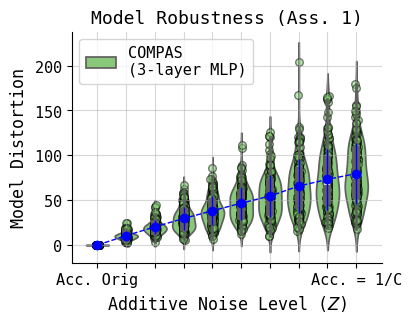

<ipython-input-32-7fd90aad586c>:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Perturbation',


(10, 150)


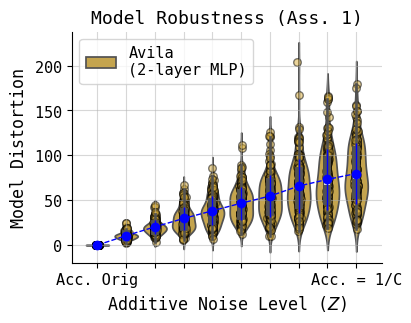

<ipython-input-32-7fd90aad586c>:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Perturbation',


(10, 150)


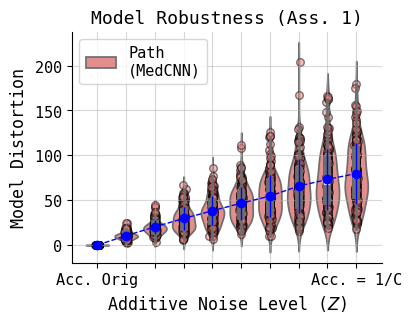

<ipython-input-32-7fd90aad586c>:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Perturbation',


(10, 150)


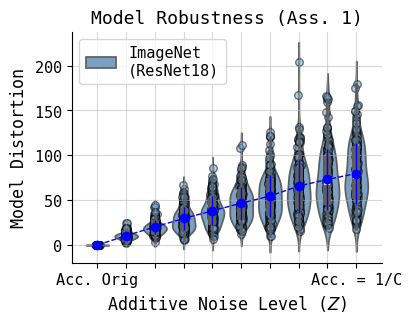

<ipython-input-32-7fd90aad586c>:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Perturbation',


(10, 150)


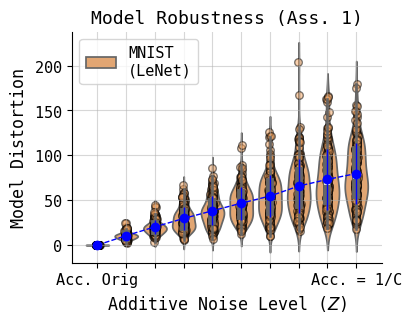

In [33]:
# Load data.
df_robustness = pd.concat([convert_dict_to_df("discovery_simple_10_class_and_full.pkl")])
df_robustness.reset_index()

# Plot!
plot_robustness(df_robustness)

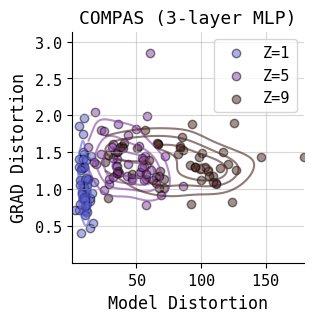

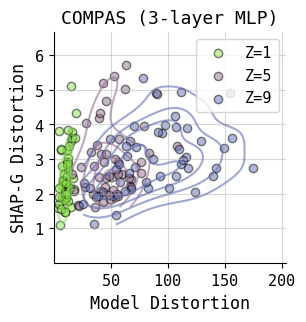

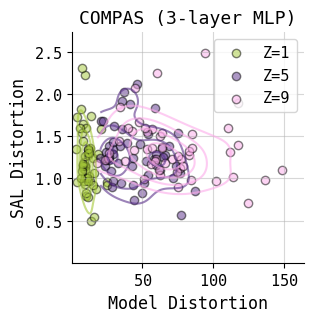

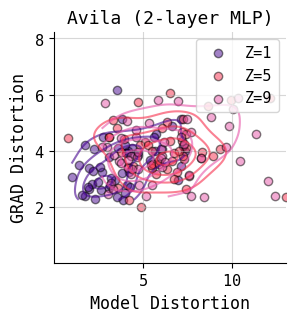

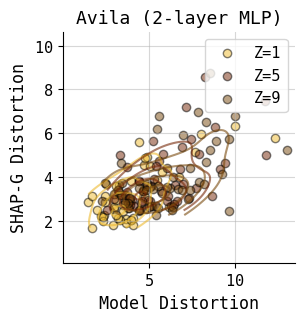

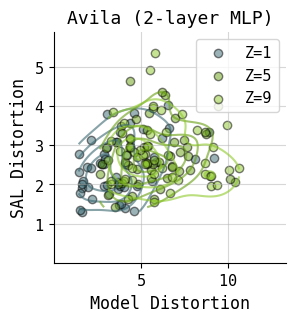

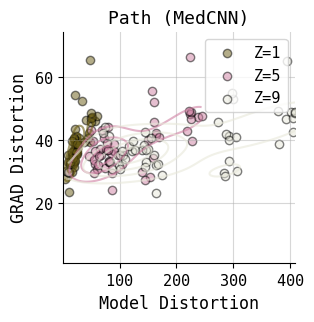

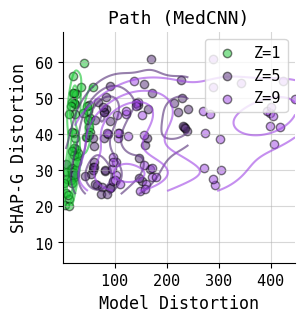

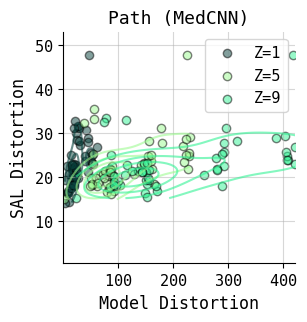

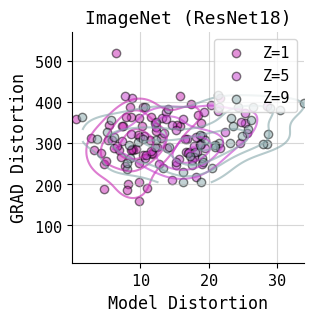

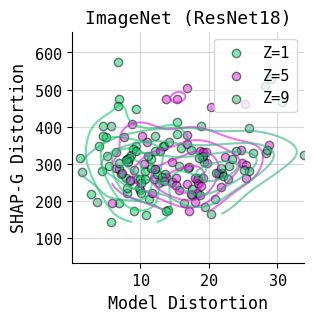

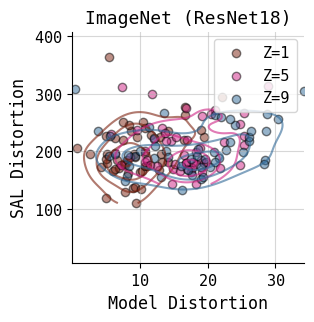

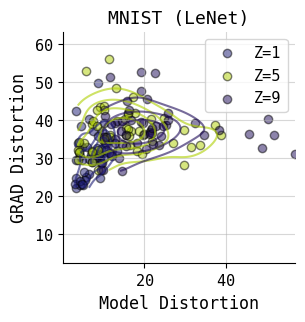

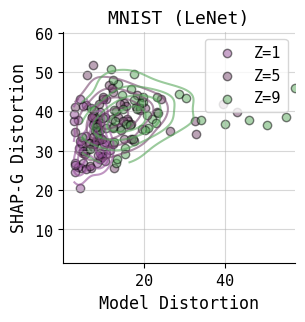

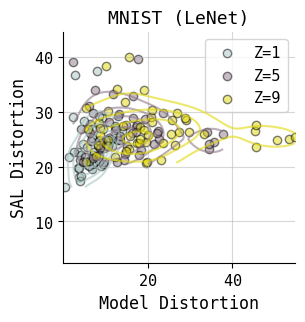

In [38]:
# Plot!
plot_alignment(df_robustness, noise_types=["Bridge - Input - Additive - Class"], noise_levels=[1, 5, 9])

### Sensitivity - Layer-wise Randomsiation

Run sensitivity analysis.
```bash
torchrun --nproc_per_node=3 run_comparison.py --fname=sensitivity_analysis --datasets=compas,avila,path,imagenet-1k,mnist --xai_methods=G,GS,SA --run_layer=True --full_size=50 --batch_size=50
```

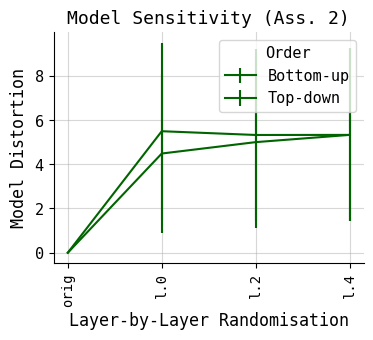

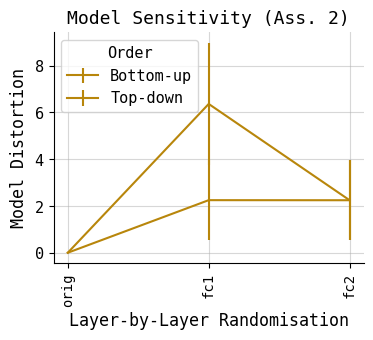

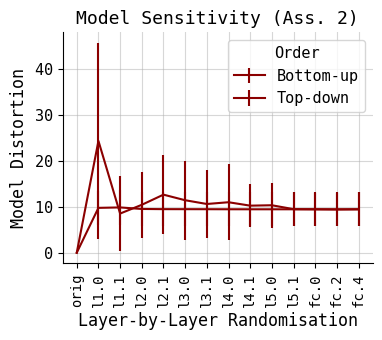

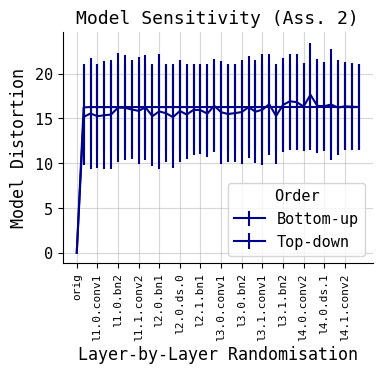

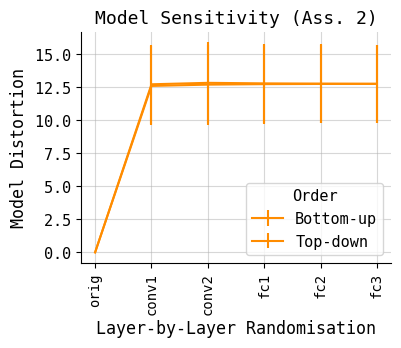

In [40]:
# Load data.
df_sensitivity = convert_layer_dict_to_df("layer_simple_logit.pkl")

# Plot!
plot_sensitivity(df_sensitivity)

### Faithfulness - Cumulative Noise

No need to run a command, requires only:
- Downloaded `mnist` and `fmnist_lenet` at repository url.

<ipython-input-50-66c01aa7f87c>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_mnist.load_state_dict(torch.load('mnist_lenet', map_location=torch.device('cpu')))
<ip

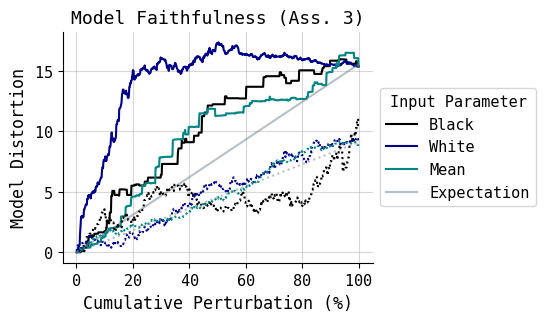

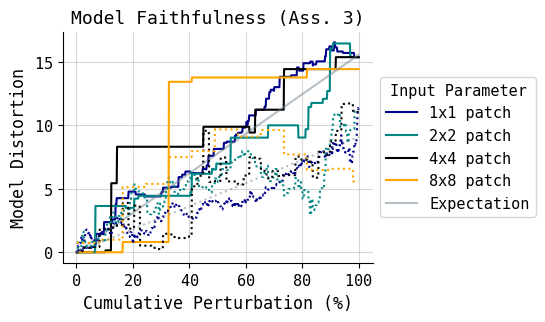

In [ ]:
# Load data and models.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_mnist = LeNet()
model_mnist.load_state_dict(torch.load('mnist_lenet', map_location=torch.device('cpu')))
model_mnist.eval().to(device)

model_fmnist = LeNet()
model_fmnist.load_state_dict(torch.load('fmnist_lenet', map_location=torch.device('cpu')))
model_fmnist.eval().to(device)

# Load a random sample.
images_mnist, labels_mnist = load_mnist_samples(n=1)
images_fmnist, labels_fmnist = load_fmnist_samples(n=1)
preds_mnist = model_mnist(images_mnist).argmax(dim=1)
preds_fmnist = model_fmnist(images_fmnist).argmax(dim=1)

# Hyperparameters.
colour_map_mnist =  {'white': 'lightblue',  'mean': '#74a892', 'black': 'gray'}
colour_map_fmnist =  {'white': 'darkblue',  'mean': '#008585', 'black': 'black'}
colour_map_patches = {1: "darkblue", 2: "#008585", 4: "black", 8: "#FFA500"}
modifications = ['black', 'white', 'mean']
patch_sizes = [1, 2, 4, 8]

# Plot baselines!
plt.figure(figsize=(4, 3))
for model, images, preds, colour_map, dataset in zip([model_mnist, model_fmnist], [images_mnist, images_fmnist], [preds_mnist, preds_fmnist], [colour_map_fmnist, colour_map_fmnist], ["MNIST", "fMNIST"]):
    confidences = []
    for modification in modifications:
        confidences.append(modify_and_predict(model, images, preds, modification=modification))
    plot_faithfulness_curve_baselines(confidences, modifications=modifications, colour_map=colour_map, linestyles={"MNIST": "-", "fMNIST": "dotted"}, dataset=dataset, distortion=True)
plt.savefig(f"plots/model_faithfulness_analysis_baselines_mnist_fmnist.svg")

# Plot patches!
plt.figure(figsize=(4, 3))
for model, images, preds, colour_map, dataset in zip([model_mnist, model_fmnist], [images_mnist, images_fmnist], [preds_mnist, preds_fmnist], [colour_map_fmnist, colour_map_fmnist], ["MNIST", "fMNIST"]):
    confidences = []
    for patch_size in patch_sizes:
        confidences.append(modify_and_predict_with_patches(model, images, preds, patch_size=patch_size, modification="black"))
    plot_faithfulness_curve_patches(confidences, patch_sizes, colour_map=colour_map_patches, linestyles={"MNIST": "-", "fMNIST": "dotted"}, dataset=dataset, distortion=True)
plt.savefig(f"plots/model_faithfulness_analysis_patches_mnist_fmnist.svg")

## Experiment — Meta-Evaluation

To reproduce these results, run the following:
```bash
torchrun --nproc_per_node=4 run_meta_evaluation.py --fname=meta_evaluation --dataset_name=ImageNet,MNIST,fMNIST --xai_round=GS_SA,G_GC --M=5 --Z=5 --K=10 --T=10
```

In [ ]:
!pip install git+https://github.com/understandable-machine-intelligence-lab/Quantus.git \
git+https://github.com/annahedstroem/MetaQuantus.git --quiet

import random
import pandas as pd
from metaquantus import *

<ipython-input-45-70c513bf80a9>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, df_group in df.groupby([col_group]):


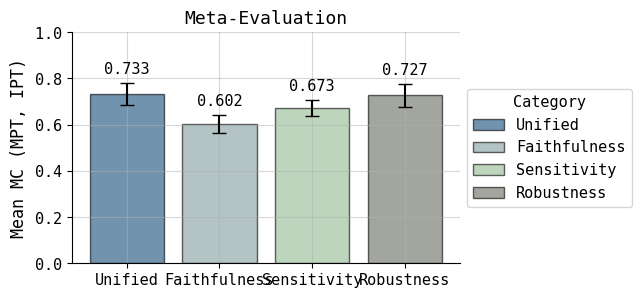

<ipython-input-45-70c513bf80a9>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, df_group in df.groupby([col_group]):


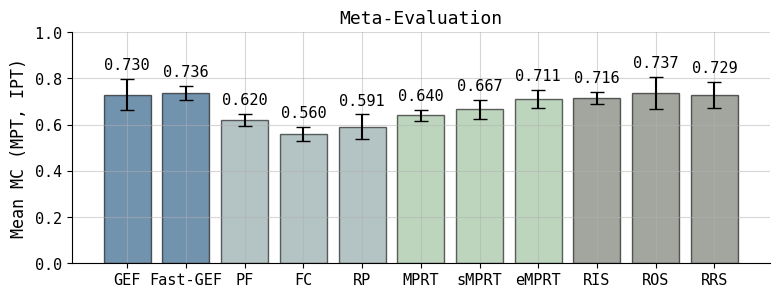

<ipython-input-46-b7dc31f34347>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, df_group in df.groupby([col_group]):


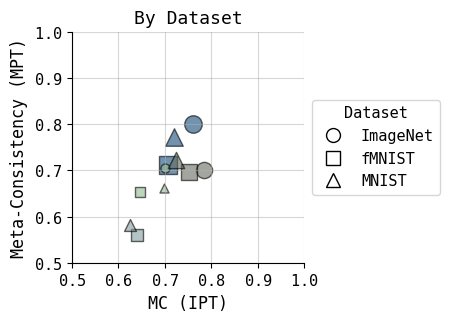

In [ ]:
# Estimator names.
estimators_faith = {'Robustness': ['Relative Representation Stability', 'Relative Output Stability', 'Relative Input Stability'], 'Faithfulness': ['Pixel-Flipping', 'Faithfulness Correlation', 'Faithfulness Estimate', 'Region Perturbation'], 'Sensitivity': ['MPRT', 'sMPRT', 'eMPRT'], 'Unified': ['Bridge - Naive', 'Bridge - Exact']}
estimators_not_exact = {'Robustness': ['Relative Representation Stability', 'Relative Output Stability', 'Relative Input Stability'], 'Fidelity': ['Pixel-Flipping','Faithfulness Correlation', 'Region Perturbation'],'Sensitivity': ['MPRT', 'sMPRT', 'eMPRT'], 'Unified': ['Bridge - Naive']}

# Load the benchmarking data for each dataset.
benchmark_im1 = load_obj("./", fname=f"meta_eval_imagenet", use_json=True)["ImageNet"]["ResNet18"]
benchmark_m1 = load_obj("./", fname=f"meta_eval_mnist_1", use_json=True)["MNIST"]["LeNet"]
benchmark_m2 = load_obj("./", fname=f"meta_eval_mnist_2", use_json=True)["MNIST"]["LeNet"]
benchmark_f1 = load_obj("./", fname=f"meta_eval_fmnist_1", use_json=True)["fMNIST"]["LeNet"]
benchmark_f2 = load_obj("./", fname=f"meta_eval_fmnist_2", use_json=True)["fMNIST"]["LeNet"]

df_meta_eval = postprocess_meta_evaluation((benchmark_m1,
                                benchmark_m2,
                                benchmark_f1,
                                benchmark_f1,
                                benchmark_im1,
                                estimators_faith))

# df_meta_eval.groupby(["Estimator"])["MC"].mean().round(3).reset_index()
# df_meta_eval["MC"] = pd.to_numeric(df_meta_eval["MC"], errors="coerce")
# df_meta_eval.groupby(["Dataset", "Estimator"])["MC"].mean().round(3).reset_index()

# Plot!
plot_meta_evaluation_bar(df_meta_eval, col_group="Category", figsize=(5, 3))
plot_meta_evaluation_bar(df_meta_eval, col_group="Estimator", figsize=(9, 3))
plot_meta_evaluation_scatter()

## Experiment — Agreement

To reproduce these results, run:

```python
torchrun --nproc_per_node=2 run_comparison.py --fname=agree_avila --datasets=avila --full_size=250 --xai_methods=LRPz,GS,RA --M=1 --Z=5 --T=10 --K=10
torchrun --nproc_per_node=3 run_comparison.py --fname=agree_compas --datasets=compas --full_size=250 --xai_methods=IXG,SG,RA --M=1 --Z=5 --T=10 --K=10
torchrun --nproc_per_node=3 run_comparison.py --fname=agree_imdb --datasets=imdb --full_size=250 --batch_size=50 --xai_methods=LIG,PS,RA --M=1 --Z=5 --T=10 --K=10
torchrun --nproc_per_node=3 run_comparison.py --fname=agree_mnist --datasets=mnist --batch_size=125 --full_size=250 --xai_methods=AM,GS,RA --M=1 --Z=5 --T=10 --K=10 --am_steps=50
torchrun --nproc_per_node=2 run_comparison.py --fname=agree_derma --datasets=derma --full_size=250 --xai_methods=FO,IG,RA --M=1 --Z=5 --T=10 --K=10 --am_steps=50
```

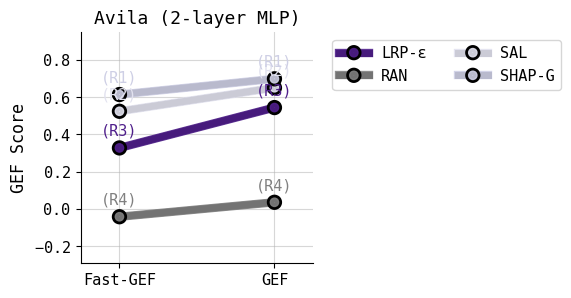

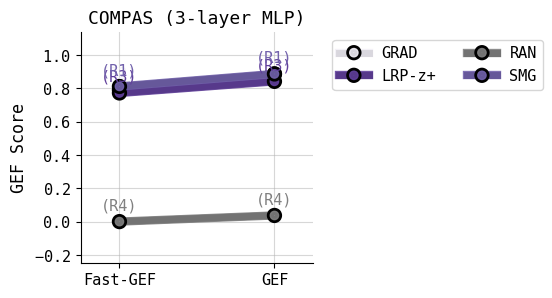

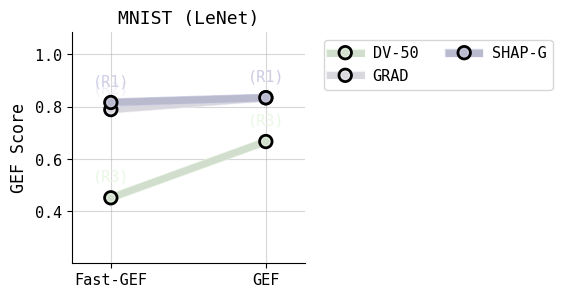

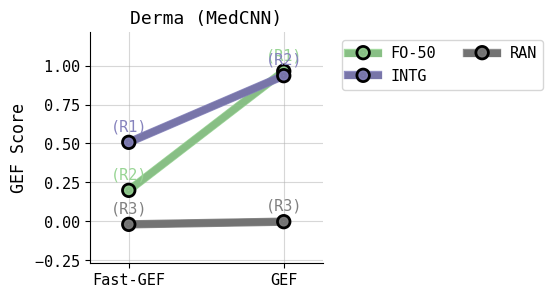

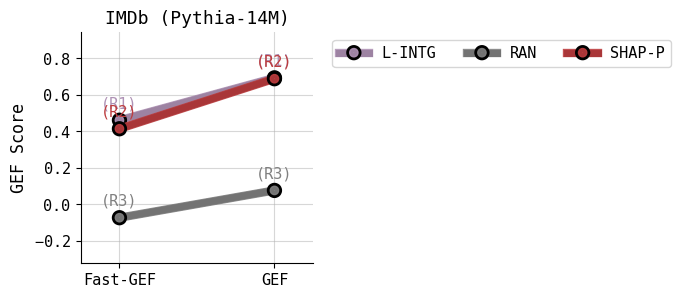

In [ ]:
# Plot agreement for tabular, vision and text datasets.
df_agree_avila = convert_dict_to_df("scores_consolidated_13062024_bn_vs_be_tab.pkl", keep_only_first_model=True)
plot_agreement(df_agree_avila, dtype="tab_avila", ncols=2, colors=colors)
df_agree_compas = convert_dict_to_df("scores_consolidated_09072024_bn_vs_be_tab.pkl", keep_only_first_model=True)
plot_agreement(df_agree_compas, dtype="tab_compas", ncols=2, colors=colors)
df_agree_mnist = convert_dict_to_df("scores_consolidated_15062024_bn_vs_be_vis.pkl", keep_only_first_model=True)
plot_agreement(df_agree_mnist, dtype="vis_mnist", ncols=2, colors=colors)
df_agree_derma = convert_dict_to_df("scores_consolidated_20082024_bn_vs_be_vis_derma.pkl", keep_only_first_model=True)
plot_agreement(df_agree_derma, dtype="vis_derma", ncols=2, colors=colors)
df_agree_imdb = convert_dict_to_df("scores_consolidated_06082024_bn_vs_be_tex.pkl", keep_only_first_model=True)
plot_agreement(df_agree_imdb, dtype="tex_all", colors={'L-INTG': colors_text['L-INTG-5'], 'SHAP-P': colors_text['SHAP-P-5'], 'RAN': 'gray',})

## Experiment — Influence of Z

To reproduce these results, run:
```bash
torchrun --nproc_per_node=3 run_comparison.py --fname=z_influence_2 --datasets=compas,avila,path,imagenet-1k,mnist --xai_methods=G,GS,SA --run_discovery=True --full_size=50 --batch_size=50 --only_naive=True --Z=2
torchrun --nproc_per_node=3 run_comparison.py --fname=z_influence_5 --datasets=compas,avila,path,imagenet-1k,mnist --xai_methods=G,GS,SA --run_discovery=True --full_size=50 --batch_size=50 --only_naive=True --Z=5
torchrun --nproc_per_node=4 run_comparison.py --fname=z_influence_20 --datasets=compas,avila,path,imagenet-1k,mnist --xai_methods=G,GS,SA --run_discovery=True --full_size=50 --batch_size=50 --only_naive=True --Z=20
```

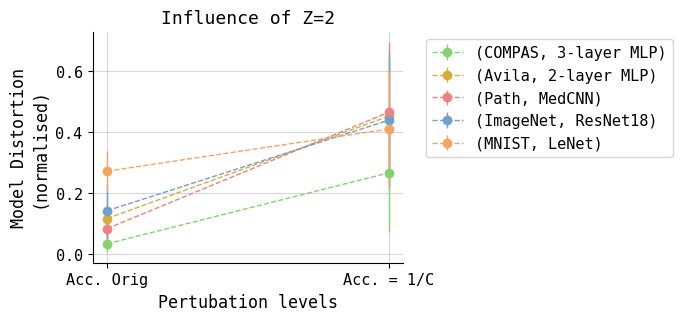

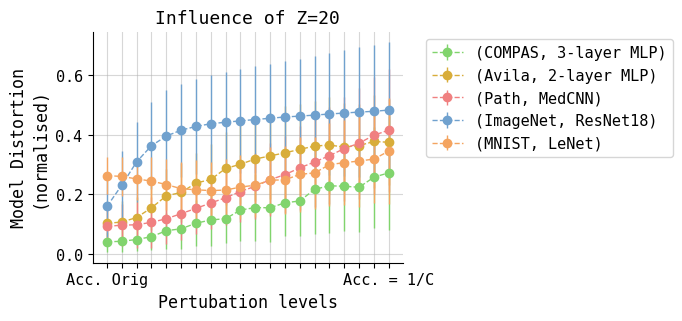

In [ ]:
# Load data.
df_Z_20 = convert_dict_to_df("scores_consolidated_13082024_discovery_simple_20.pkl")
df_Z_20.reset_index()
df_Z_2 = convert_dict_to_df("scores_consolidated_13082024_discovery_simple_2.pkl")
df_Z_2.reset_index()

# Plot!
plot_Z_influence(df_Z_2, noise_types=["Bridge - Input - Multiplicative - Class"], Z=2)
plot_Z_influence(df_Z_20, noise_types=["Bridge - Input - Multiplicative - Class"], Z=20)